## Atmospheric data exploration

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

#### Import libraries

In [2]:
from jupyterthemes import jtplot
from src.plot_settings import ps_defaults
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
ps_defaults(use_tex=False, dpi=150)

In [3]:
import os
import xarray as xr
from src.constants import ATMOS_DATA_PATH, ATMOS_TMP_PATH
import matplotlib.pyplot as plt

### Plot surface / first time step for each netcdf

/home/users/sithom/seager19/atmos/DATA/ps-ECMWF-clim.nc
<xarray.DataArray 'ps' (Y: 181, X: 360)>
array([[ 687.9422 ,  687.78577,  687.6293 , ...,  688.2831 ,  688.1781 ,
         688.073  ],
       [ 692.98706,  692.7152 ,  692.4431 , ...,  693.70496,  693.4722 ,
         693.2395 ],
       [ 700.1859 ,  699.7168 ,  699.24756, ...,  701.7343 ,  701.20886,
         700.6833 ],
       ...,
       [1013.86414, 1013.83826, 1013.8124 , ..., 1013.8568 , 1013.86487,
        1013.873  ],
       [1013.9978 , 1013.97504, 1013.9523 , ..., 1014.0255 , 1014.0189 ,
        1014.01245],
       [1014.0222 , 1014.01013, 1013.99805, ..., 1014.0552 , 1014.0444 ,
        1014.0336 ]], dtype=float32)
Coordinates:
  * X        (X) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    longname:            ps
    standard_name:       surface_air_pressure
    file_missing_value:  -32767.0
    units:          

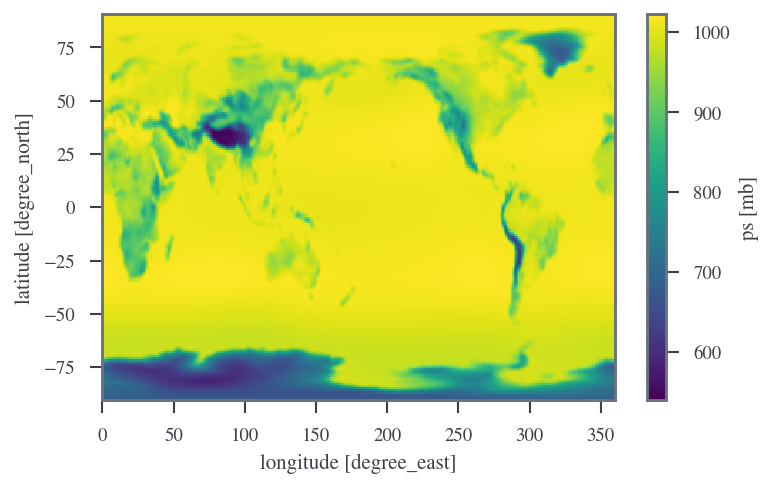

/home/users/sithom/seager19/atmos/DATA/ps-ECMWF-clim.nc
/home/users/sithom/seager19/atmos/DATA/ts-ECMWF-clim60.nc
<xarray.DataArray 'ts' (lat: 121, lon: 360)>
array([[272.35745, 272.36572, 272.3738 , ..., 272.33817, 272.34207, 272.34915],
       [272.44464, 272.44553, 272.44965, ..., 272.45956, 272.45172, 272.44693],
       [272.5696 , 272.56668, 272.5674 , ..., 272.61224, 272.59235, 272.578  ],
       ...,
       [283.0484 , 283.06445, 283.03735, ..., 282.94315, 282.93237, 282.98486],
       [282.98822, 282.97885, 282.95038, ..., 283.03952, 282.9837 , 282.98413],
       [282.9207 , 282.91418, 282.8777 , ..., 283.0664 , 282.98663, 282.93576]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes:
    offline_operation:   time average and spatial interpolation
    _Fillvalue:          9.96921e+36
    _CoordinateAxes:     time depth lat

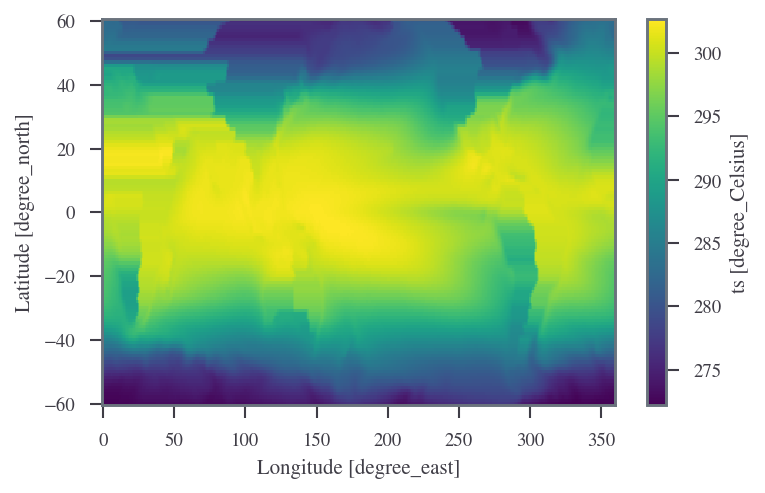

/home/users/sithom/seager19/atmos/DATA/ts-ECMWF-clim60.nc
/home/users/sithom/seager19/atmos/DATA/sfcWind-ECMWF-clim60.nc
<xarray.DataArray 'sfcWind' (lat: 121, lon: 360)>
array([[8.701183, 8.695446, 8.689709, ..., 8.672974, 8.681144, 8.691164],
       [9.035653, 9.033125, 9.030596, ..., 8.997764, 9.008766, 9.02221 ],
       [9.370123, 9.370803, 9.371483, ..., 9.322554, 9.336388, 9.353255],
       ...,
       [8.169539, 8.115654, 8.061768, ..., 6.875378, 7.316834, 7.743187],
       [8.25209 , 8.176073, 8.100058, ..., 7.796485, 7.973645, 8.112867],
       [8.334641, 8.236494, 8.138347, ..., 8.717593, 8.630455, 8.482548]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes:
    units:               m s**-1
    file_missing_value:  -999
    long_name:           sfcWind
    longname:            sfcWind


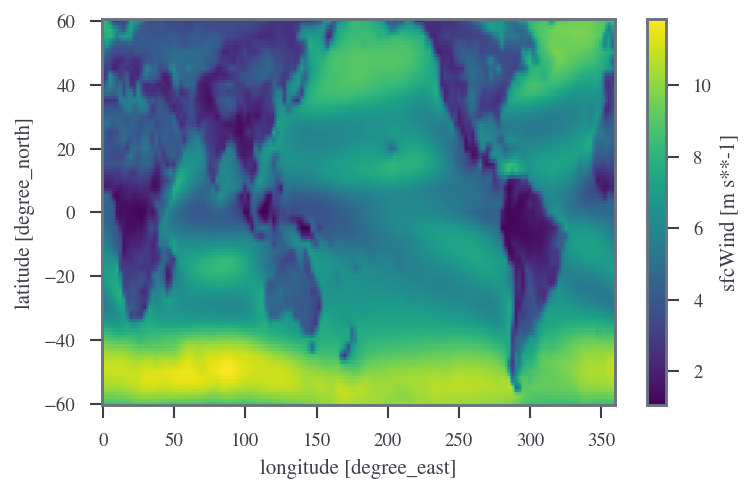

/home/users/sithom/seager19/atmos/DATA/sfcWind-ECMWF-clim60.nc
/home/users/sithom/seager19/atmos/DATA/pr-ECMWF-trend.nc
<xarray.DataArray 'pr' (Y: 181, X: 360)>
array([[7.388783e-07, 7.388784e-07, 7.388783e-07, ..., 7.388782e-07,
        7.388783e-07, 7.388782e-07],
       [5.012889e-07, 5.019024e-07, 5.025159e-07, ..., 5.042989e-07,
        5.000480e-07, 5.006684e-07],
       [2.636996e-07, 2.649265e-07, 2.661534e-07, ..., 2.697195e-07,
        2.612177e-07, 2.624587e-07],
       ...,
       [1.460489e-06, 1.471732e-06, 1.482975e-06, ..., 1.462052e-06,
        1.461572e-06, 1.461030e-06],
       [1.271023e-06, 1.276644e-06, 1.282266e-06, ..., 1.271804e-06,
        1.271564e-06, 1.271294e-06],
       [1.081556e-06, 1.081556e-06, 1.081556e-06, ..., 1.081556e-06,
        1.081556e-06, 1.081556e-06]], dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attr

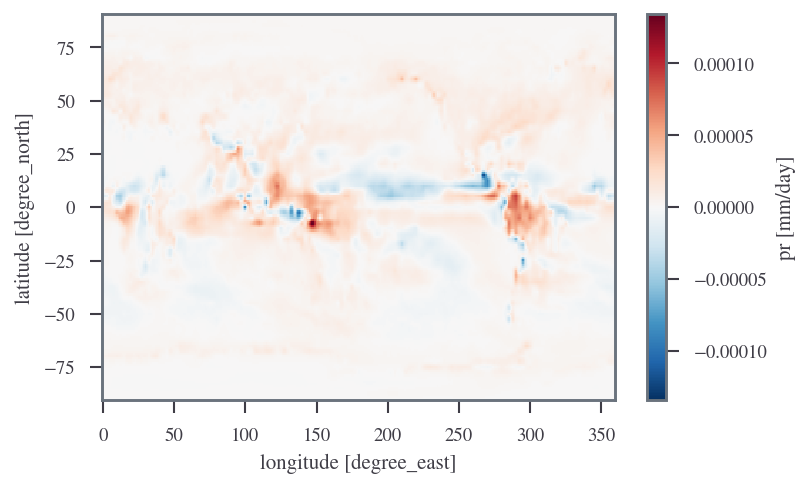

/home/users/sithom/seager19/atmos/DATA/pr-ECMWF-trend.nc
/home/users/sithom/seager19/atmos/DATA/sst-ECMWF-clim.nc
<xarray.DataArray 'sst' (Y: 181, X: 360)>
array([[-1.356625, -1.463945, -1.463945, ..., -1.247139, -1.247139, -1.248222],
       [-1.356625, -1.463945, -1.463945, ..., -1.247139, -1.247139, -1.248222],
       [-1.356625, -1.463945, -1.463945, ..., -1.247139, -1.247139, -1.248222],
       ...,
       [-1.745945, -1.747051, -1.748138, ..., -1.742598, -1.743717, -1.74483 ],
       [-1.737937, -1.738351, -1.738758, ..., -1.736661, -1.737093, -1.737518],
       [-1.733166, -1.733265, -1.733363, ..., -1.732865, -1.732966, -1.733066]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    Z        float32 0.0
    T        float32 0.5
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/13)
    standard_name:       sea_water_potential_temperature
    _Fillvalue:          9.96921

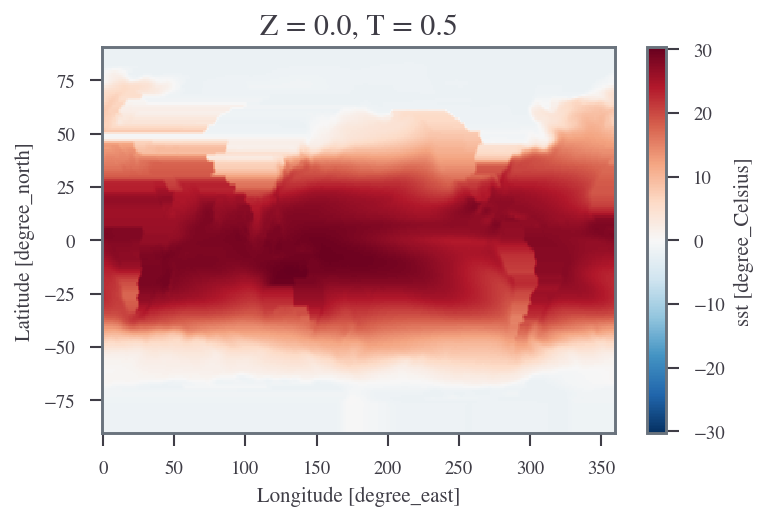

/home/users/sithom/seager19/atmos/DATA/sst-ECMWF-clim.nc
/home/users/sithom/seager19/atmos/DATA/mask-360x181.nc
<xarray.DataArray 'mask' (Y: 181, X: 360)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    long_name:           gridbox land fraction
    units:               unitless
    from_hires:          true
    file_missing_value:  1e+36
    history:             [(Written on date: 20051027\ndefinesurf -remap -t /f...


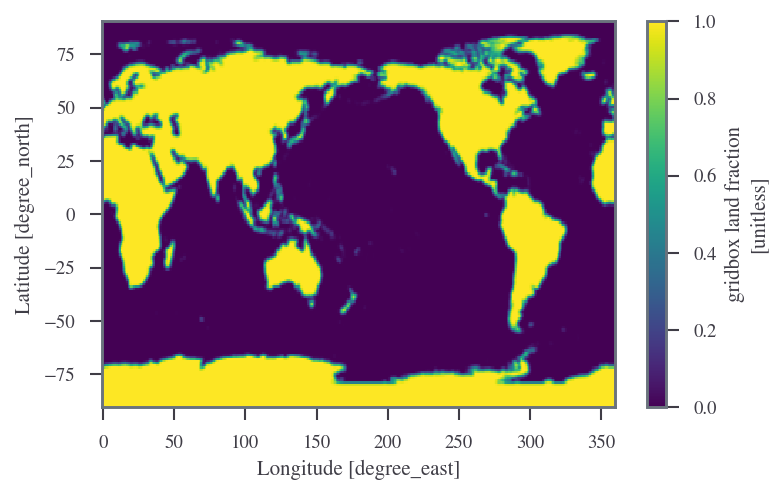

/home/users/sithom/seager19/atmos/DATA/mask-360x181.nc
/home/users/sithom/seager19/atmos/DATA/ts-ECMWF-clim.nc
<xarray.DataArray 'ts' (Y: 181, X: 360)>
array([[271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       [271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       [271.39435, 271.3733 , 271.3733 , ..., 271.42206, 271.42206, 271.41873],
       ...,
       [271.40546, 271.40454, 271.40366, ..., 271.40817, 271.40726, 271.40634],
       [271.41605, 271.4157 , 271.4154 , ..., 271.41705, 271.4167 , 271.41638],
       [271.42194, 271.42184, 271.42178, ..., 271.42218, 271.4221 , 271.42203]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    _CoordinateAxes:     time depth lat lon
    file_missing_value:  -999
    _Fillvalue:          9.96921e+36
    units:               degree_Celsius


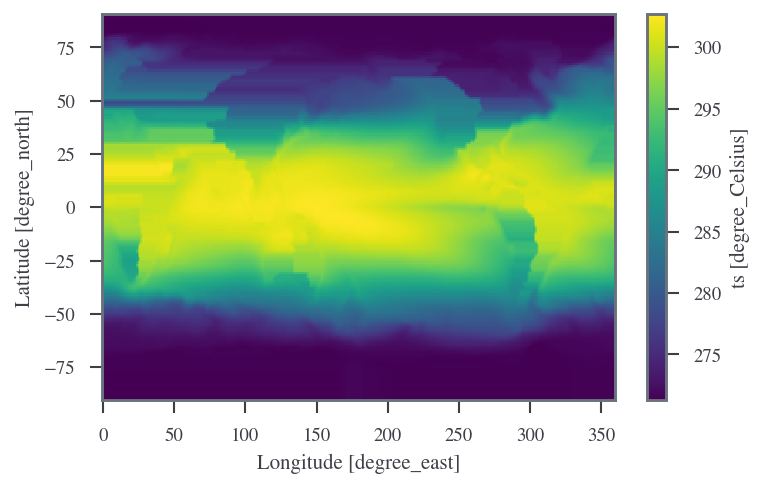

/home/users/sithom/seager19/atmos/DATA/ts-ECMWF-clim.nc
/home/users/sithom/seager19/atmos/DATA/mask-360x180.nc
<xarray.DataArray 'mask' (Y: 180, X: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * X        (X) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * Y        (Y) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/13)
    dodsname:            sftlf
    fnname:              sqrt
    long_name:           mask
    longname:            mask
    file_missing_value:  1e+20
    standard_name:       land_area_fraction
    ...                  ...
    cell_measures:       area: areacella
    original_name:       mo: m01s00i505*100
    xyarray:             [-1 361 60 91]
    cxyarray:            0
    units:            

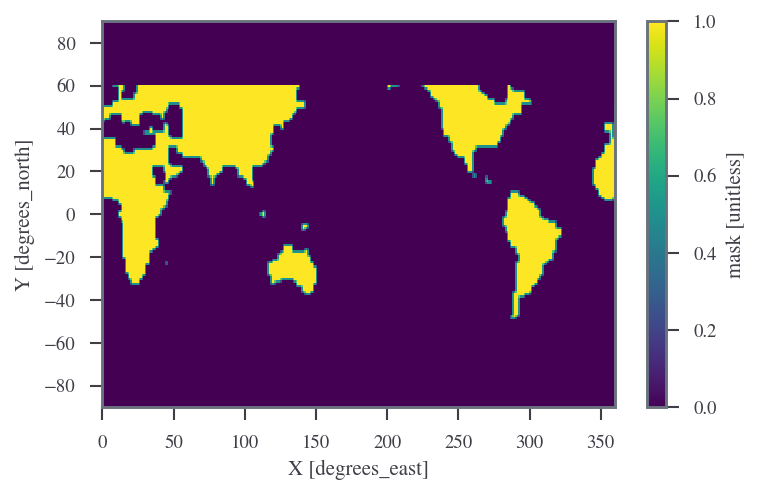

/home/users/sithom/seager19/atmos/DATA/mask-360x180.nc
/home/users/sithom/seager19/atmos/DATA/clt-ECMWF-clim60.nc
<xarray.DataArray 'clt' (lat: 121, lon: 360)>
array([[89.80084 , 89.71525 , 89.61392 , ..., 89.97354 , 89.89951 , 89.842186],
       [89.62929 , 89.53077 , 89.4365  , ..., 89.762985, 89.71197 , 89.67825 ],
       [89.44501 , 89.378395, 89.28217 , ..., 89.59954 , 89.54461 , 89.49521 ],
       ...,
       [69.06275 , 68.77278 , 68.40645 , ..., 71.51115 , 70.11055 , 69.53739 ],
       [71.08953 , 70.48234 , 69.80097 , ..., 72.814644, 72.08576 , 71.579185],
       [72.90329 , 72.06864 , 71.090385, ..., 74.31931 , 73.82193 , 73.31054 ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes: (12/13)
    process:             199
    units:               unitless
    gribleveltype:       1
    PDS_TimeRange:       113
    center: 

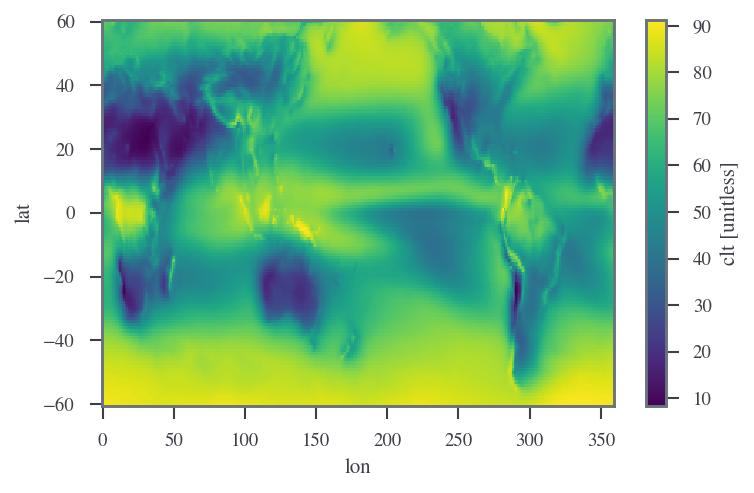

/home/users/sithom/seager19/atmos/DATA/clt-ECMWF-clim60.nc
/home/users/sithom/seager19/atmos/DATA/ts-ECMWF-trend.nc
<xarray.DataArray 'ts' (Y: 181, X: 360)>
array([[ 0.166413,  0.221416,  0.221416, ...,  0.111409,  0.111409,  0.111409],
       [ 0.166413,  0.221416,  0.221416, ...,  0.111409,  0.111409,  0.111409],
       [ 0.166413,  0.221416,  0.221416, ...,  0.111409,  0.111409,  0.111409],
       ...,
       [-0.005848, -0.006504, -0.007157, ..., -0.004088, -0.004651, -0.005225],
       [-0.010393, -0.010608, -0.01082 , ..., -0.00973 , -0.009954, -0.010175],
       [-0.011715, -0.011784, -0.011852, ..., -0.011508, -0.011577, -0.011646]],
      dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    _Fillvalue:          9.96921e+36
    standard_name:       sea_water_potential_temperature
    associate:           time depth lat lon
    dods

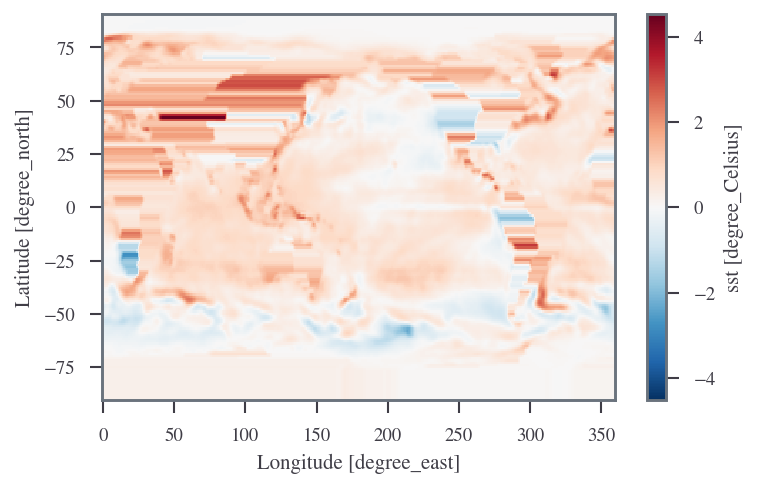

/home/users/sithom/seager19/atmos/DATA/ts-ECMWF-trend.nc
/home/users/sithom/seager19/atmos/DATA/sst-ECMWF-trend.nc
<xarray.DataArray 'sst' (Y: 181, X: 360)>
array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.012209, 0.011848, 0.011465, ..., 0.012909, 0.012706, 0.012492],
       [0.003647, 0.003544, 0.003443, ..., 0.003958, 0.003853, 0.00375 ],
       [0.000688, 0.000651, 0.000613, ..., 0.000803, 0.000764, 0.000726]],
      dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    dodsname:            sst
    file_missing_value:  -999
    _Fillvalue:          9.96921e+36
    interval_write:      monthly
    associate:           time depth lat lon
    units

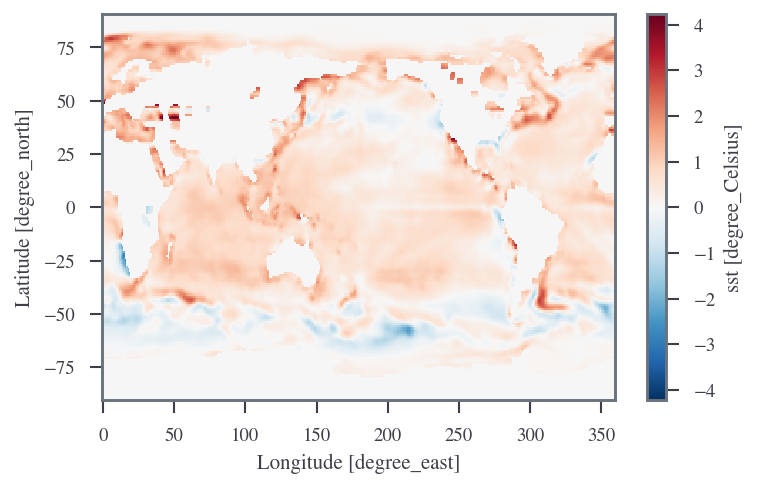

/home/users/sithom/seager19/atmos/DATA/sst-ECMWF-trend.nc
/home/users/sithom/seager19/atmos/DATA/rh-fixed-clim60.nc
<xarray.DataArray 'rh' (lat: 121, lon: 360)>
array([[80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.],
       ...,
       [80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes: (12/13)
    long_name:      rh
    gribparam:      168
    center:         European Center for Medium-Range Weather Forecasts - Reading
    process:        255
    units:          unitless
    grib_name:      td2m
    ...             ...
    PDS_TimeRange:  123
    gribNumBits:    16
    calendar:       standard
    gribleveltype:  1
    fnname:         eexp

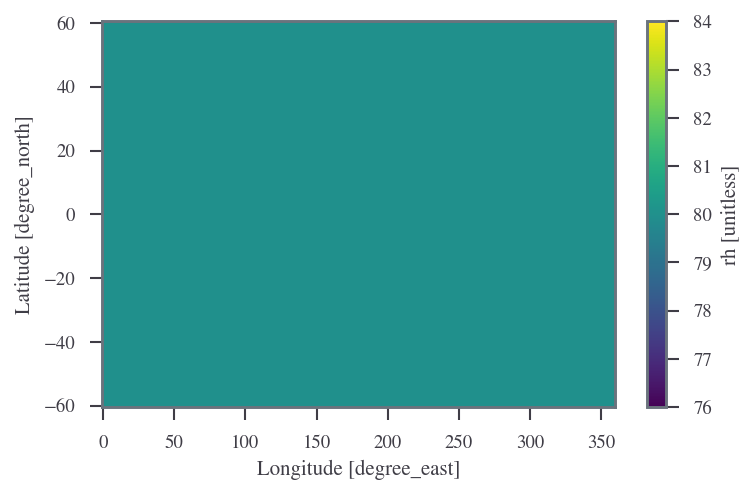

/home/users/sithom/seager19/atmos/DATA/rh-fixed-clim60.nc
/home/users/sithom/seager19/atmos/DATA/rh-ECMWF-clim60.nc
<xarray.DataArray 'rh' (lat: 121, lon: 360)>
array([[83.7233  , 83.71125 , 83.707184, ..., 83.80861 , 83.7656  , 83.743065],
       [83.91754 , 83.91104 , 83.91474 , ..., 83.970276, 83.93956 , 83.9275  ],
       [84.019295, 84.02017 , 84.0249  , ..., 84.021385, 84.01417 , 84.01664 ],
       ...,
       [82.275185, 82.17096 , 81.98408 , ..., 82.46049 , 82.36125 , 82.29836 ],
       [82.18216 , 81.918564, 81.58176 , ..., 82.5827  , 82.50029 , 82.345894],
       [81.979385, 81.59484 , 81.16958 , ..., 82.60367 , 82.47571 , 82.26612 ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Attributes: (12/14)
    gribNumBits:         16
    grib_name:           td2m
    PDS_TimeRange:       123
    process:             255
    units:    

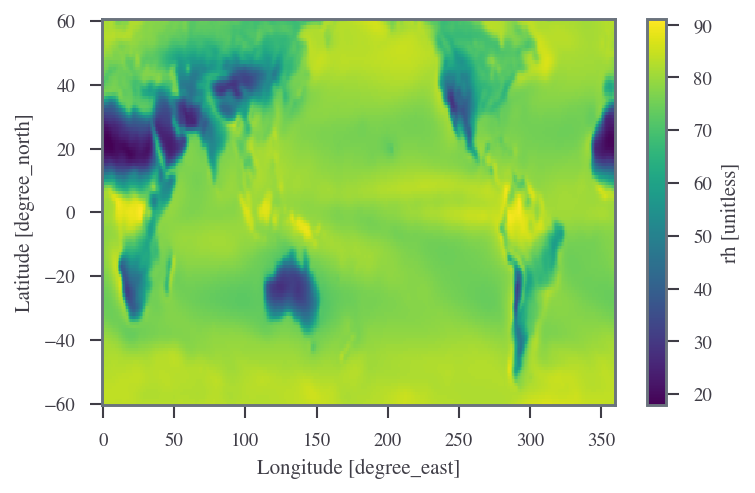

/home/users/sithom/seager19/atmos/DATA/rh-ECMWF-clim60.nc
/home/users/sithom/seager19/atmos/DATA/sfcWind-ECMWF-clim.nc
<xarray.DataArray 'sfcWind' (Y: 181, X: 360)>
array([[5.70018 , 5.692569, 5.684958, ..., 5.685765, 5.689994, 5.695087],
       [6.067078, 6.05497 , 6.042863, ..., 6.071806, 6.06957 , 6.068324],
       [6.433976, 6.417371, 6.400766, ..., 6.457846, 6.449146, 6.441561],
       ...,
       [5.673502, 5.673409, 5.673316, ..., 5.649358, 5.656786, 5.665144],
       [5.66669 , 5.664417, 5.662143, ..., 5.646687, 5.652813, 5.659751],
       [5.659877, 5.655424, 5.65097 , ..., 5.644016, 5.64884 , 5.654359]])
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:      m s**-1
    long_name:  sfcWind
    longname:   sfcWind


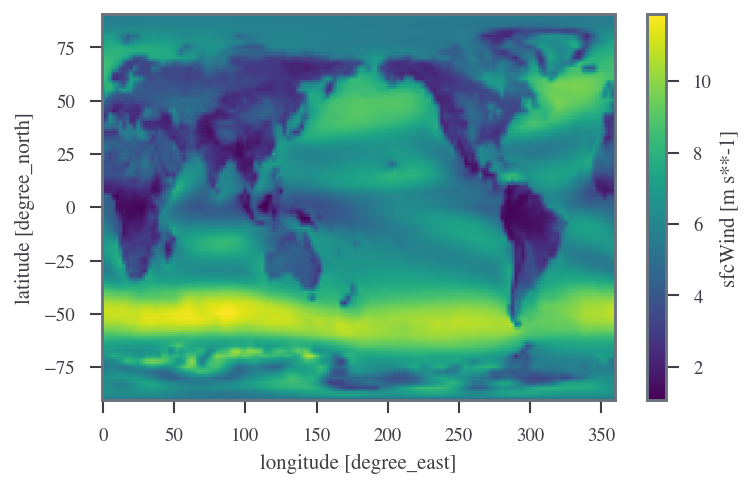

/home/users/sithom/seager19/atmos/DATA/sfcWind-ECMWF-clim.nc
/home/users/sithom/seager19/atmos/DATA/pr-ECMWF-clim.nc
<xarray.DataArray 'pr' (Y: 181, X: 360)>
array([[1.486084e-06, 1.486085e-06, 1.486084e-06, ..., 1.486084e-06,
        1.486084e-06, 1.486084e-06],
       [1.144607e-06, 1.142893e-06, 1.141179e-06, ..., 1.153592e-06,
        1.149449e-06, 1.147028e-06],
       [8.031296e-07, 7.997019e-07, 7.962742e-07, ..., 8.210994e-07,
        8.128126e-07, 8.079712e-07],
       ...,
       [7.146955e-06, 7.152938e-06, 7.158921e-06, ..., 7.109228e-06,
        7.122105e-06, 7.134529e-06],
       [7.158568e-06, 7.161560e-06, 7.164551e-06, ..., 7.139704e-06,
        7.146143e-06, 7.152356e-06],
       [7.170182e-06, 7.170182e-06, 7.170182e-06, ..., 7.170182e-06,
        7.170182e-06, 7.170182e-06]], dtype=float32)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attribu

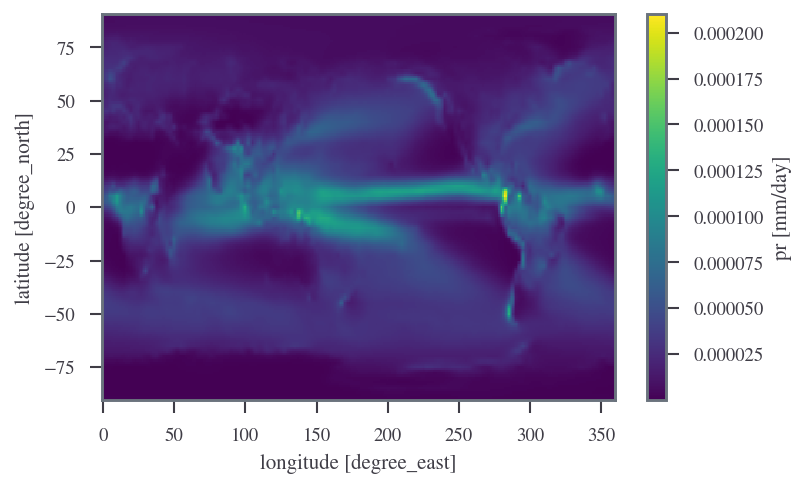

/home/users/sithom/seager19/atmos/DATA/pr-ECMWF-clim.nc


<Figure size 826.772x510.973 with 0 Axes>

In [4]:
for item in os.listdir(ATMOS_DATA_PATH):
    name = ATMOS_DATA_PATH / item
    xr_da = xr.open_dataarray(name, decode_times=False)
    if "T" in xr_da.dims:
        xr_da = xr_da.isel(T=0)
    if "Z" in xr_da.dims:
        xr_da = xr_da.isel(Z=0)
    print(name)
    print(xr_da)
    xr_da.plot.imshow()
    plt.show()
    print(name)
    plt.clf()

/home/users/sithom/seager19/atmos/tmp/S91-Hq1800-PrcpLand1.nc
<xarray.Dataset>
Dimensions:   (X: 180, Yu: 59, Yv: 60)
Coordinates:
  * X         (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yv        (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0
  * Yu        (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Data variables: (12/37)
    vtrend    (Yv, X) float64 ...
    vend      (Yv, X) float64 ...
    vbeg      (Yv, X) float64 ...
    wnspClim  (Yu, X) float64 ...
    tsClim    (Yu, X) float64 ...
    prClim    (Yu, X) float64 ...
    ...        ...
    MCbeg     (Yu, X) float64 ...
    qabeg     (Yu, X) float64 ...
    K         float32 ...
    epsu      float32 ...
    epsv      float32 ...
    Hq        float32 ...
<xarray.DataArray 'vtrend' (Yv: 60, X: 180)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.018718,  0.019869,  0.020083, ...,  0.011765,  0.016625,  0.017987],
   

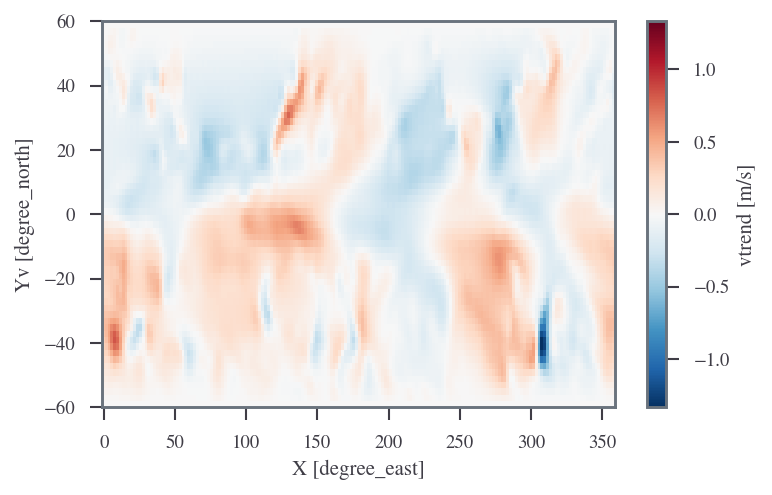

<xarray.DataArray 'vend' (Yv: 60, X: 180)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.183956,  0.185441,  0.187881, ...,  0.169992,  0.177054,  0.181066],
       [ 0.366928,  0.369032,  0.375266, ...,  0.349683,  0.360275,  0.364937],
       ...,
       [-0.175872, -0.173169, -0.113064, ...,  0.150362,  0.06068 , -0.0874  ],
       [-0.099065, -0.081485, -0.043306, ...,  0.133507,  0.039711, -0.066852],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yv       (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0


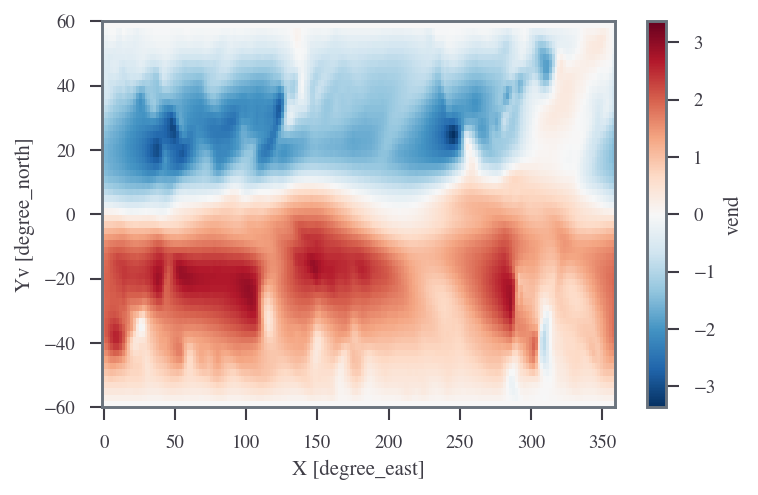

<xarray.DataArray 'vbeg' (Yv: 60, X: 180)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.165239,  0.165572,  0.167798, ...,  0.158227,  0.160429,  0.163079],
       [ 0.325181,  0.325079,  0.329357, ...,  0.313945,  0.31648 ,  0.321716],
       ...,
       [-0.186264, -0.19215 , -0.15607 , ...,  0.200917,  0.087277, -0.085411],
       [-0.110042, -0.087034, -0.056793, ...,  0.166205,  0.058533, -0.069514],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yv       (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0


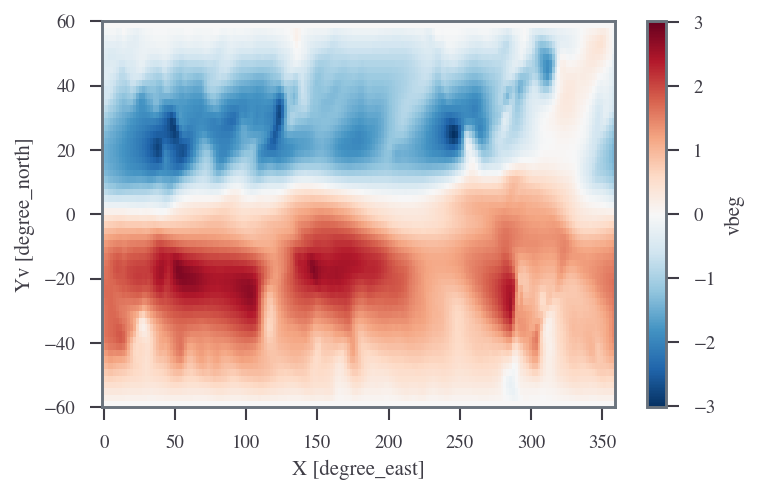

<xarray.DataArray 'wnspClim' (Yu: 59, X: 180)>
array([[ 9.419524,  9.42322 ,  9.42478 , ...,  9.346466,  9.359971,  9.385437],
       [ 9.995323, 10.006735, 10.029243, ...,  9.906073,  9.926533,  9.951863],
       [10.451788, 10.45811 , 10.493629, ..., 10.308962, 10.350789, 10.391028],
       ...,
       [ 6.623406,  7.4361  ,  7.200084, ...,  6.593089,  6.348463,  5.369631],
       [ 7.893165,  7.913937,  8.017044, ...,  6.573031,  6.155467,  6.294631],
       [ 8.180008,  8.071959,  7.904267, ...,  7.047289,  6.441497,  7.331366]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


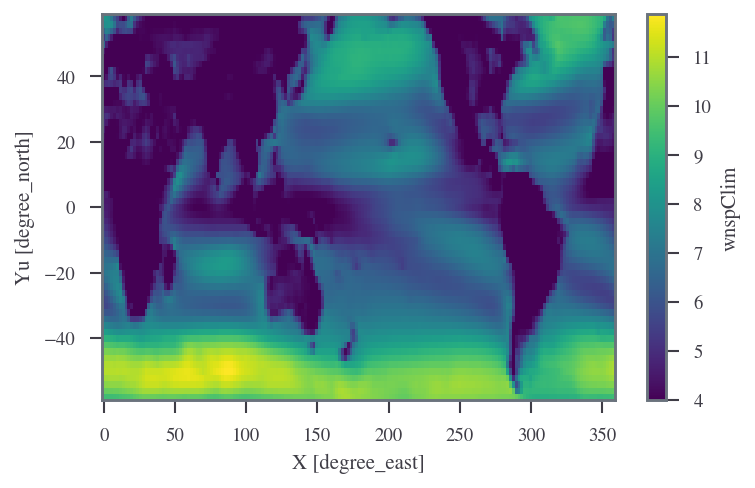

<xarray.DataArray 'tsClim' (Yu: 59, X: 180)>
array([[272.565002, 272.562531, 272.569366, ..., 272.687592, 272.62735 ,
        272.585632],
       [272.984009, 272.991272, 272.957336, ..., 273.181396, 273.084076,
        273.004944],
       [273.752655, 273.757446, 273.666016, ..., 273.865906, 273.815735,
        273.739319],
       ...,
       [283.578247, 283.708801, 283.947388, ..., 284.192169, 284.097351,
        283.633057],
       [283.144745, 283.31897 , 283.375122, ..., 283.878601, 283.55307 ,
        282.90152 ],
       [283.067169, 283.061432, 282.998901, ..., 283.699493, 283.236115,
        282.938477]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


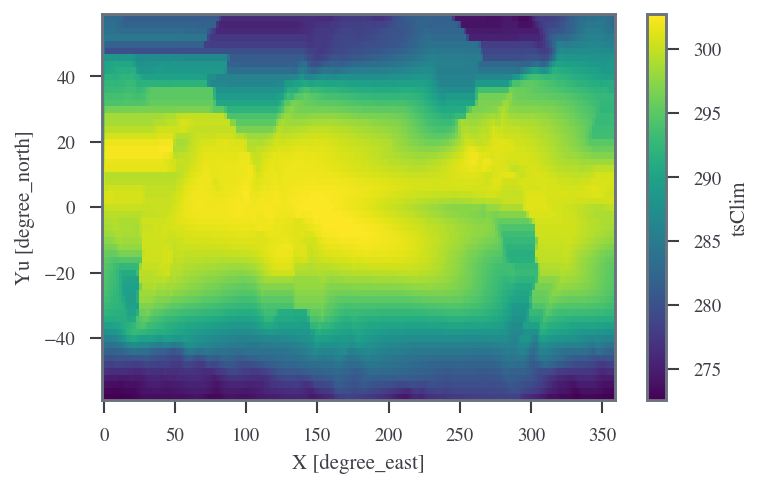

<xarray.DataArray 'prClim' (Yu: 59, X: 180)>
array([[2.423993e-05, 2.414862e-05, 2.409772e-05, ..., 2.429753e-05,
        2.421461e-05, 2.417900e-05],
       [2.701966e-05, 2.703372e-05, 2.713332e-05, ..., 2.717954e-05,
        2.704264e-05, 2.692798e-05],
       [2.999482e-05, 2.998919e-05, 3.011275e-05, ..., 2.982601e-05,
        2.981519e-05, 2.979843e-05],
       ...,
       [1.763721e-05, 2.014634e-05, 2.248650e-05, ..., 2.939861e-05,
        2.690058e-05, 2.223652e-05],
       [2.056877e-05, 2.247714e-05, 2.464496e-05, ..., 3.280054e-05,
        2.868401e-05, 2.255826e-05],
       [2.510050e-05, 2.701886e-05, 3.099499e-05, ..., 3.481709e-05,
        2.991775e-05, 2.420902e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


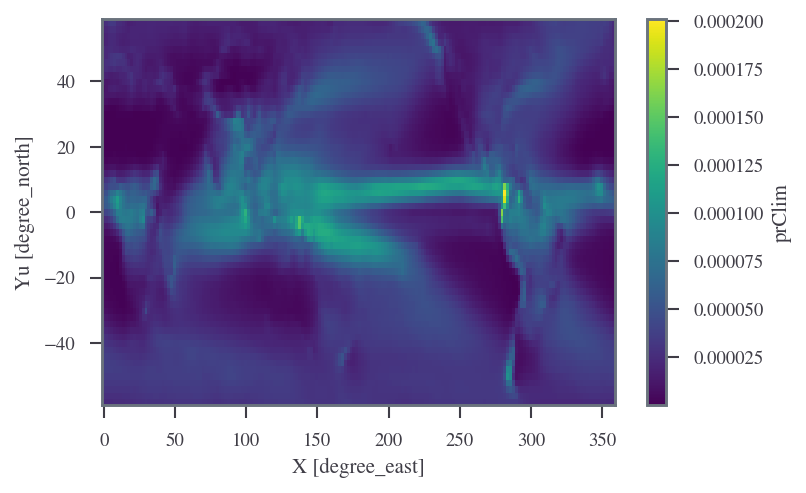

<xarray.DataArray 'spClim' (Yu: 59, X: 180)>
array([[ 988.420532,  988.292175,  988.127808, ...,  989.100403,  988.872986,
         988.653748],
       [ 991.299072,  991.211456,  991.108612, ...,  991.786438,  991.62262 ,
         991.479919],
       [ 994.558105,  994.504059,  994.428711, ...,  994.901367,  994.793579,
         994.690063],
       ...,
       [1012.742798, 1013.795654, 1014.026367, ..., 1005.932007, 1002.980927,
         996.990967],
       [1012.80426 , 1012.577972, 1012.755554, ..., 1000.054443,  988.014709,
        1000.643921],
       [1011.33728 , 1011.479797, 1011.656372, ..., 1000.239655,  992.650818,
        1006.014496]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


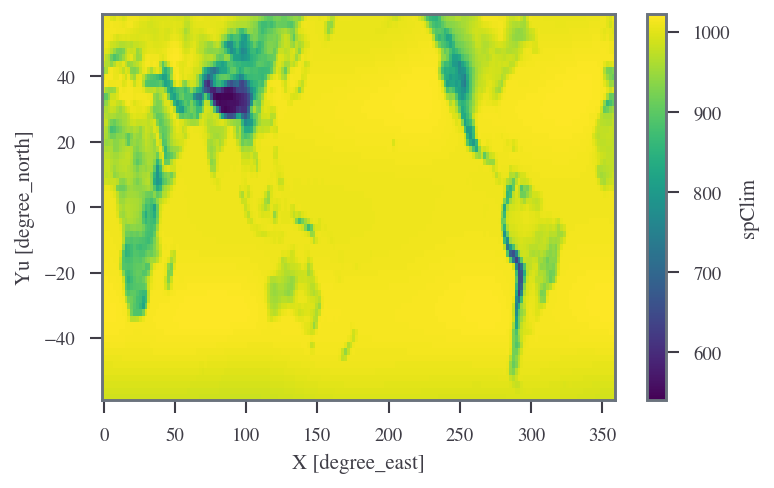

<xarray.DataArray 'tsTrend' (Yu: 59, X: 180)>
array([[-0.378164, -0.410222, -0.426889, ..., -0.320859, -0.347328, -0.354125],
       [-0.507376, -0.558964, -0.552493, ..., -0.267115, -0.361338, -0.435335],
       [-0.764647, -0.880446, -0.874632, ..., -0.489336, -0.604485, -0.68638 ],
       ...,
       [ 0.991223,  1.061296,  1.173451, ...,  0.600023,  0.708124,  1.057747],
       [ 1.107572,  0.814458,  0.776095, ...,  0.560491,  0.820263,  1.4092  ],
       [ 0.772756,  0.633669,  0.772913, ...,  0.420907,  0.673245,  0.877202]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


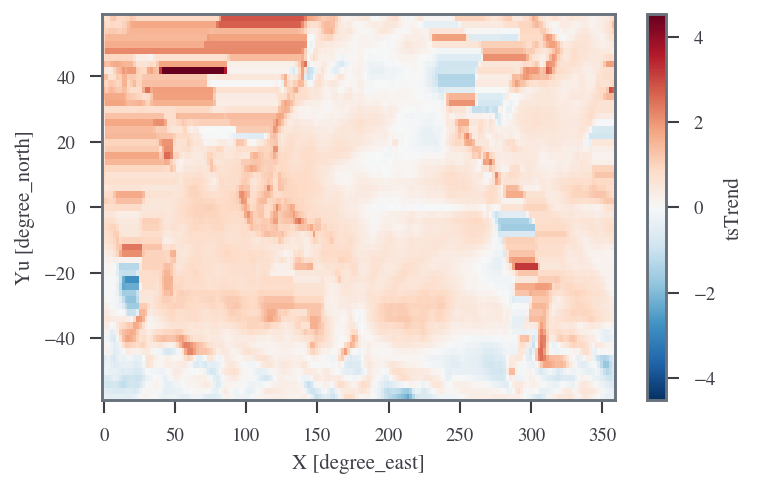

<xarray.DataArray 'prTrend' (Yu: 59, X: 180)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


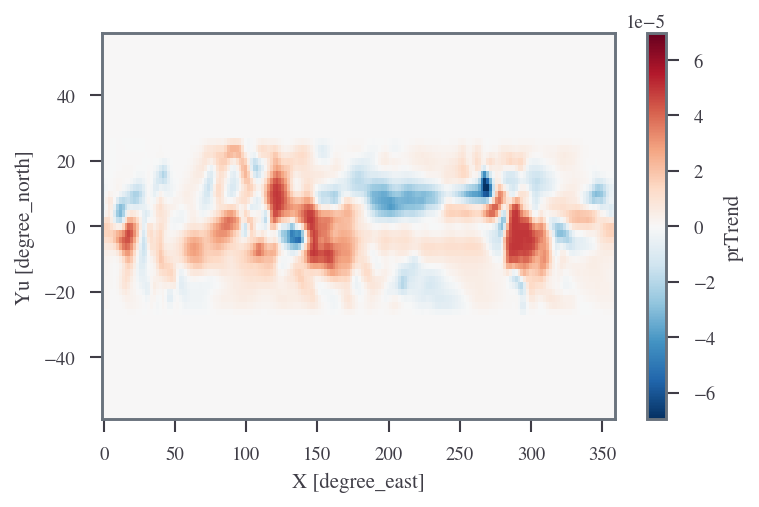

<xarray.DataArray 'mask' (Yu: 59, X: 180)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


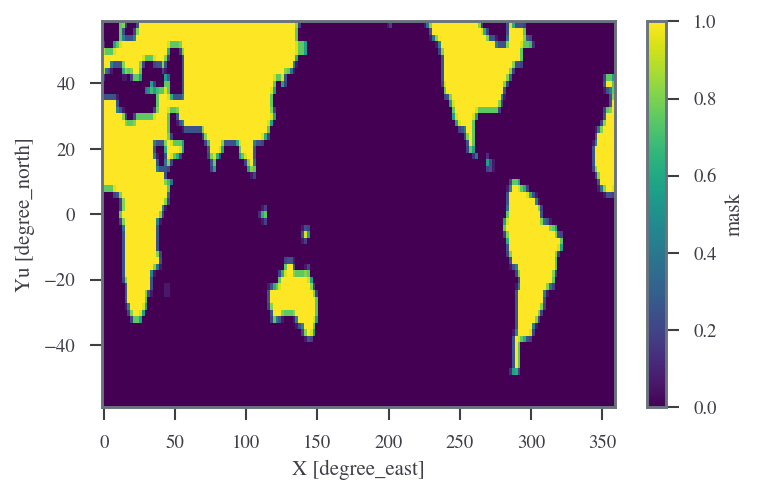

<xarray.DataArray 'utrend' (Yu: 59, X: 180)>
array([[ 0.199436,  0.189551,  0.178841, ...,  0.223153,  0.217281,  0.208821],
       [ 0.112336,  0.100887,  0.086494, ...,  0.159577,  0.142131,  0.125995],
       [ 0.009032, -0.003457, -0.018431, ...,  0.102822,  0.06452 ,  0.032235],
       ...,
       [-0.182756, -0.199406, -0.189758, ..., -0.146783, -0.152213, -0.164225],
       [-0.208218, -0.204038, -0.18175 , ..., -0.168045, -0.184338, -0.201454],
       [-0.203714, -0.193275, -0.18532 , ..., -0.174876, -0.202023, -0.213581]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    m/s


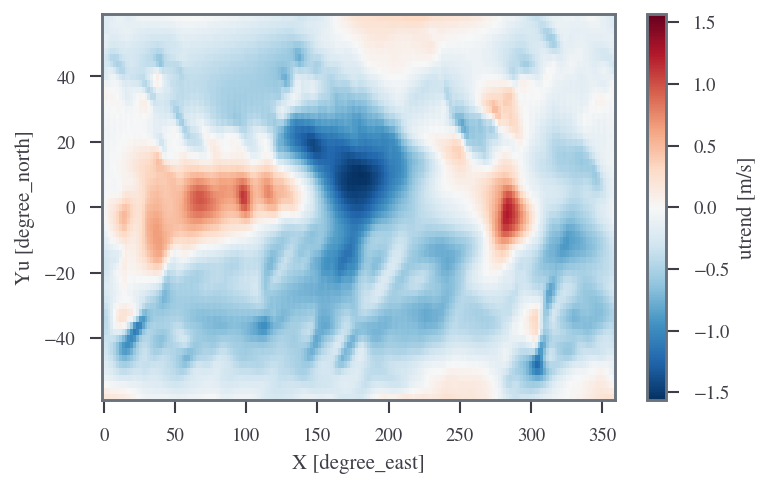

<xarray.DataArray 'phitrend' (Yu: 59, X: 180)>
array([[-132.418014, -133.400218, -134.355449, ..., -129.433506, -130.409936,
        -131.417579],
       [-127.500559, -128.85278 , -130.187837, ..., -123.383564, -124.72051 ,
        -126.124496],
       [-125.830768, -127.633315, -129.42134 , ..., -119.583021, -121.748583,
        -123.892643],
       ...,
       [-223.098438, -221.993629, -220.183859, ..., -222.999355, -223.672071,
        -223.651933],
       [-217.137701, -216.058479, -214.722521, ..., -217.858578, -218.229257,
        -217.946726],
       [-210.609712, -209.792482, -208.954403, ..., -212.19956 , -211.953441,
        -211.391042]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    m2/s2


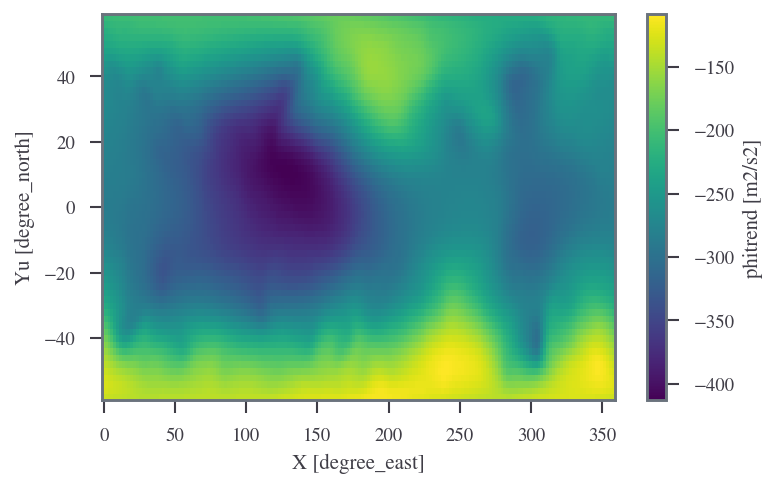

<xarray.DataArray 'tstrend' (Yu: 59, X: 180)>
array([[-0.378164, -0.410222, -0.426889, ..., -0.320859, -0.347328, -0.354125],
       [-0.507376, -0.558964, -0.552493, ..., -0.267115, -0.361338, -0.435335],
       [-0.764647, -0.880446, -0.874632, ..., -0.489336, -0.604485, -0.68638 ],
       ...,
       [ 0.991223,  1.061296,  1.173451, ...,  0.600023,  0.708124,  1.057747],
       [ 1.107572,  0.814458,  0.776095, ...,  0.560491,  0.820263,  1.4092  ],
       [ 0.772756,  0.633669,  0.772913, ...,  0.420907,  0.673245,  0.877202]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


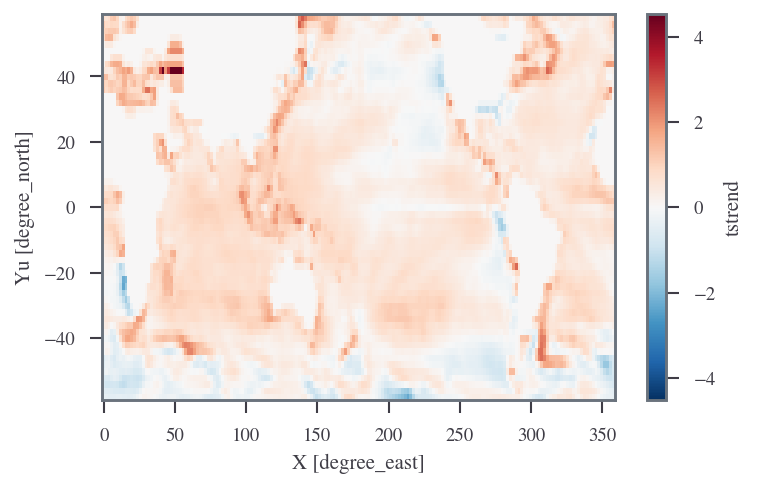

<xarray.DataArray 'PRtrend' (Yu: 59, X: 180)>
array([[-4.387132e-07, -4.524230e-07, -4.767375e-07, ..., -4.077974e-07,
        -4.389283e-07, -4.374396e-07],
       [-7.659539e-07, -7.449172e-07, -6.448943e-07, ..., -5.646955e-07,
        -6.044607e-07, -6.728968e-07],
       [-1.258934e-06, -1.485222e-06, -1.173889e-06, ..., -1.140205e-06,
        -8.896363e-07, -8.975881e-07],
       ...,
       [ 2.267913e-06,  2.925781e-06,  2.040402e-06, ...,  2.541823e-06,
         2.876780e-06,  2.333858e-06],
       [ 6.129331e-07,  7.582765e-07,  1.568504e-06, ...,  1.848092e-06,
         2.633819e-06,  2.067842e-06],
       [ 1.735551e-07,  4.549679e-07,  1.741900e-06, ...,  1.046211e-06,
         1.530185e-06,  1.054866e-06]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    m/s


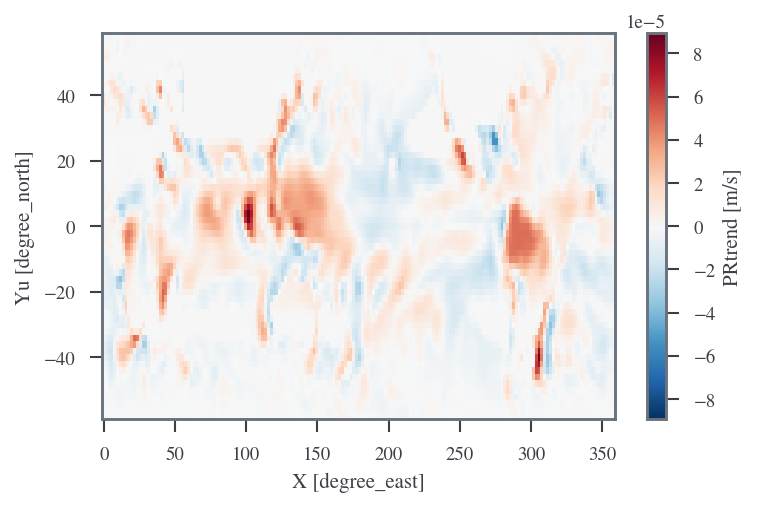

<xarray.DataArray 'Qthtrend' (Yu: 59, X: 180)>
array([[-4.376898e-07, -4.747943e-07, -4.940848e-07, ..., -3.713644e-07,
        -4.019996e-07, -4.098666e-07],
       [-5.872408e-07, -6.469493e-07, -6.394590e-07, ..., -3.091609e-07,
        -4.182154e-07, -5.038602e-07],
       [-8.850080e-07, -1.019034e-06, -1.012306e-06, ..., -5.663609e-07,
        -6.996359e-07, -7.944208e-07],
       ...,
       [ 1.147249e-06,  1.228351e-06,  1.358161e-06, ...,  6.944715e-07,
         8.195884e-07,  1.224244e-06],
       [ 1.281912e-06,  9.426599e-07,  8.982580e-07, ...,  6.487164e-07,
         9.493789e-07,  1.631019e-06],
       [ 8.943932e-07,  7.334135e-07,  8.945749e-07, ...,  4.871612e-07,
         7.792184e-07,  1.015280e-06]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    K/s


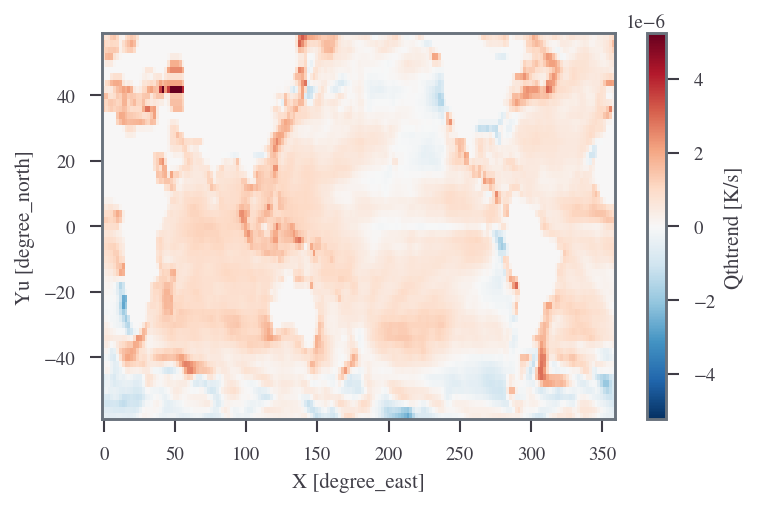

<xarray.DataArray 'uend' (Yu: 59, X: 180)>
array([[ 0.861165,  0.850617,  0.836007, ...,  0.881999,  0.878423,  0.872535],
       [-0.670855, -0.683055, -0.703224, ..., -0.6181  , -0.63752 , -0.651718],
       [-2.046651, -2.060904, -2.08787 , ..., -1.946498, -1.987026, -2.015983],
       ...,
       [-2.476084, -2.485015, -2.493655, ..., -2.810069, -2.698636, -2.580716],
       [-1.723319, -1.738354, -1.736121, ..., -2.03207 , -1.899105, -1.781914],
       [-0.957482, -0.971984, -0.954747, ..., -1.240732, -1.046641, -0.957126]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


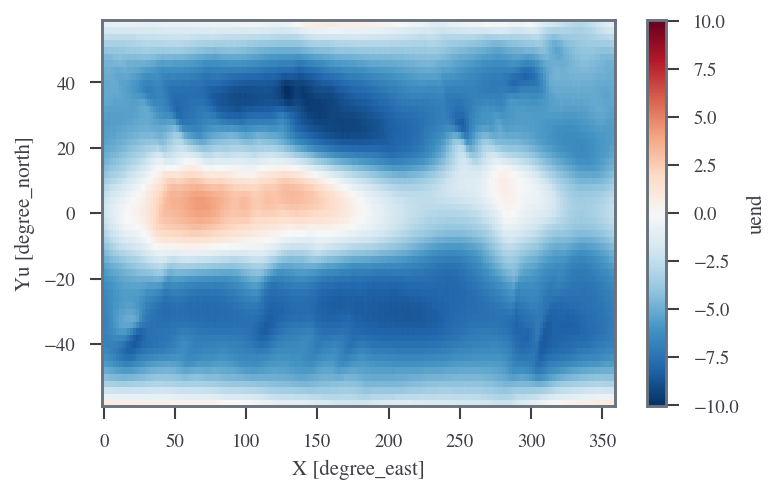

<xarray.DataArray 'wend' (Yu: 59, X: 180)>
array([[ 9.419524,  9.42322 ,  9.42478 , ...,  9.346466,  9.359971,  9.385437],
       [ 9.995323, 10.006735, 10.029243, ...,  9.906073,  9.926533,  9.951863],
       [10.451788, 10.45811 , 10.493629, ..., 10.308962, 10.350789, 10.391028],
       ...,
       [ 6.623406,  7.4361  ,  7.200084, ...,  6.593089,  6.348463,  5.369631],
       [ 7.893165,  7.913937,  8.017044, ...,  6.573031,  6.155467,  6.294631],
       [ 8.180008,  8.071959,  7.904267, ...,  7.047289,  6.441497,  7.331366]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


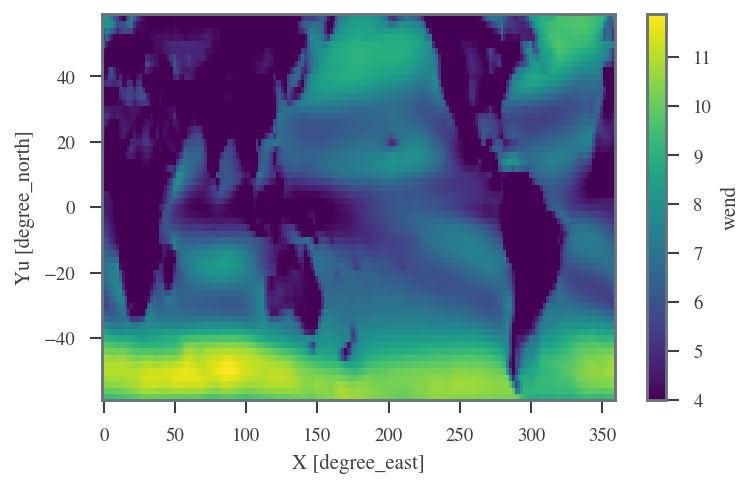

<xarray.DataArray 'phiend' (Yu: 59, X: 180)>
array([[-43278.654865, -43277.758183, -43290.565127, ..., -43254.028172,
        -43266.751083, -43265.833189],
       [-43276.423506, -43275.902485, -43289.284086, ..., -43250.52618 ,
        -43263.663015, -43263.09343 ],
       [-43320.735021, -43320.638486, -43334.792588, ..., -43292.359264,
        -43306.493352, -43306.621464],
       ...,
       [-43831.50795 , -43830.941689, -43827.22946 , ..., -43857.96953 ,
        -43844.277847, -43836.441387],
       [-43765.329495, -43764.408052, -43761.01194 , ..., -43784.06041 ,
        -43773.55293 , -43768.349451],
       [-43721.740716, -43720.464902, -43717.648246, ..., -43732.551623,
        -43726.678907, -43724.061507]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


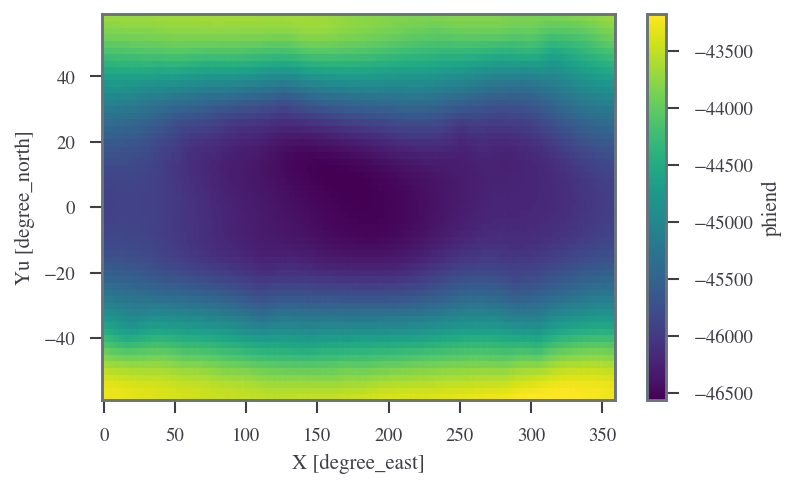

<xarray.DataArray 'tsend' (Yu: 59, X: 180)>
array([[272.37592 , 272.357419, 272.355922, ..., 272.527162, 272.453686,
        272.40857 ],
       [272.730321, 272.71179 , 272.68109 , ..., 273.047839, 272.903407,
        272.787276],
       [273.370332, 273.317223, 273.228699, ..., 273.621238, 273.513492,
        273.396129],
       ...,
       [284.073858, 284.239449, 284.534113, ..., 284.492181, 284.451413,
        284.16193 ],
       [283.698531, 283.726199, 283.76317 , ..., 284.158847, 283.963202,
        283.60612 ],
       [283.453547, 283.378267, 283.385358, ..., 283.909947, 283.572737,
        283.377077]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


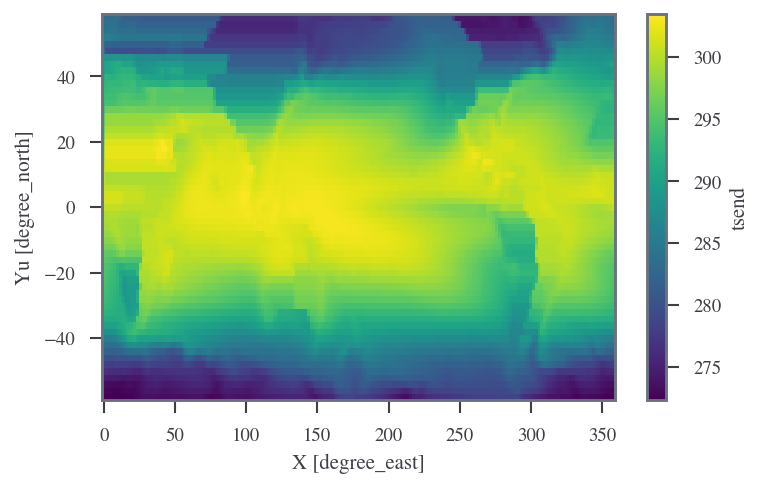

<xarray.DataArray 'PRend' (Yu: 59, X: 180)>
array([[7.504993e-06, 7.478222e-06, 7.460482e-06, ..., 7.546710e-06,
        7.494320e-06, 7.487022e-06],
       [8.181685e-06, 8.142904e-06, 8.121211e-06, ..., 8.273528e-06,
        8.192265e-06, 8.153092e-06],
       [8.644603e-06, 8.226046e-06, 8.209975e-06, ..., 8.755508e-06,
        8.753934e-06, 8.737923e-06],
       ...,
       [1.135033e-05, 1.723774e-05, 1.715051e-05, ..., 1.178982e-05,
        1.096423e-05, 6.151949e-06],
       [1.600042e-05, 1.801125e-05, 1.865945e-05, ..., 1.163676e-05,
        9.666044e-06, 9.323980e-06],
       [1.743544e-05, 1.782873e-05, 1.786484e-05, ..., 1.370469e-05,
        1.063564e-05, 1.337116e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


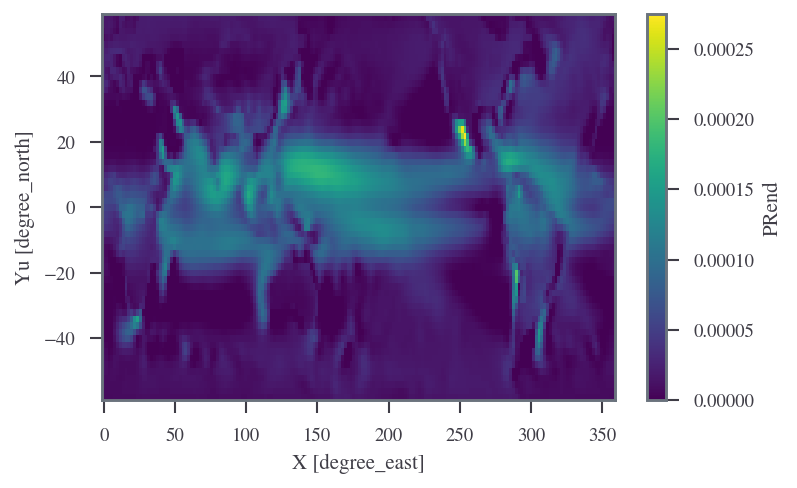

<xarray.DataArray 'Qthend' (Yu: 59, X: 180)>
array([[0.000281, 0.000281, 0.000281, ..., 0.000281, 0.000281, 0.000281],
       [0.000281, 0.000281, 0.000281, ..., 0.000281, 0.000281, 0.000281],
       [0.000282, 0.000282, 0.000282, ..., 0.000282, 0.000282, 0.000282],
       ...,
       [0.000294, 0.000294, 0.000295, ..., 0.000295, 0.000295, 0.000294],
       [0.000294, 0.000294, 0.000294, ..., 0.000294, 0.000294, 0.000294],
       [0.000293, 0.000293, 0.000293, ..., 0.000294, 0.000293, 0.000293]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


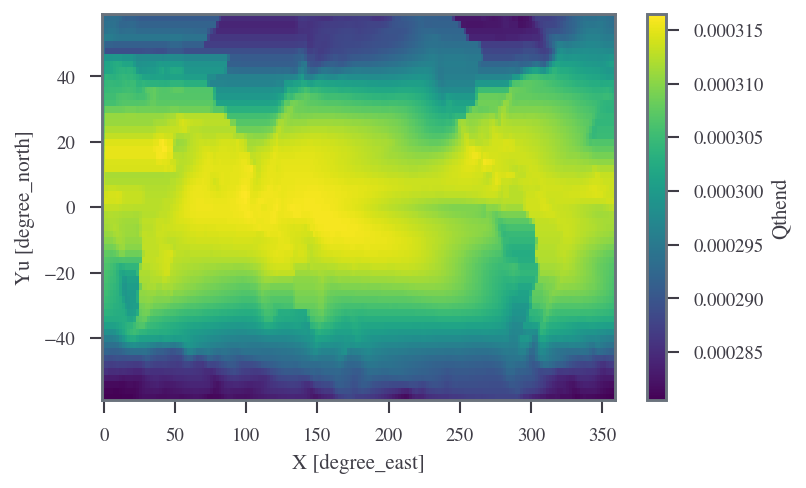

<xarray.DataArray 'Eend' (Yu: 59, X: 180)>
array([[1.258065e-05, 1.257022e-05, 1.257302e-05, ..., 1.261295e-05,
        1.256653e-05, 1.256208e-05],
       [1.365941e-05, 1.365777e-05, 1.365933e-05, ..., 1.384686e-05,
        1.373285e-05, 1.365403e-05],
       [1.491375e-05, 1.486627e-05, 1.482247e-05, ..., 1.497430e-05,
        1.491997e-05, 1.485281e-05],
       ...,
       [1.950558e-05, 2.211813e-05, 2.183369e-05, ..., 2.009800e-05,
        1.935688e-05, 1.615739e-05],
       [2.267000e-05, 2.277671e-05, 2.312632e-05, ..., 1.971384e-05,
        1.844499e-05, 1.818612e-05],
       [2.314642e-05, 2.272288e-05, 2.225749e-05, ..., 2.078547e-05,
        1.871856e-05, 2.074856e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


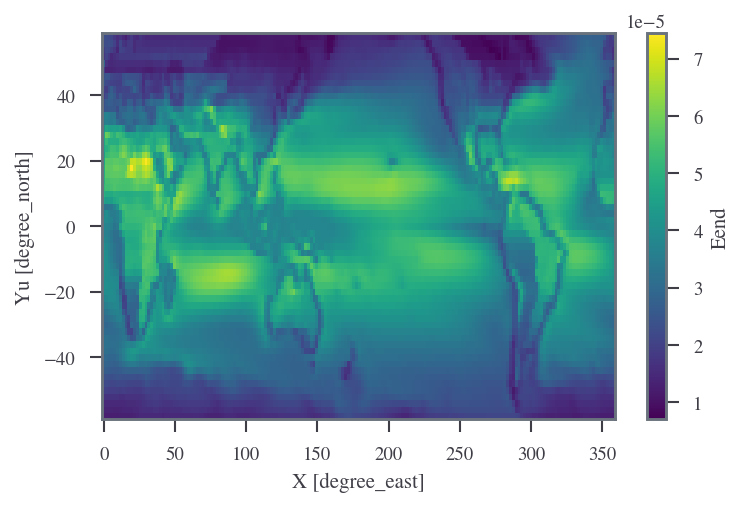

<xarray.DataArray 'MCend' (Yu: 59, X: 180)>
array([[-5.075654e-06, -5.091999e-06, -5.112535e-06, ..., -5.066242e-06,
        -5.072212e-06, -5.075055e-06],
       [-5.477724e-06, -5.514866e-06, -5.538122e-06, ..., -5.573331e-06,
        -5.540588e-06, -5.500943e-06],
       [-6.269149e-06, -6.640226e-06, -6.612490e-06, ..., -6.218787e-06,
        -6.166035e-06, -6.114888e-06],
       ...,
       [-8.155248e-06, -4.880392e-06, -4.683183e-06, ..., -8.308179e-06,
        -8.392645e-06, -1.000544e-05],
       [-6.669578e-06, -4.765463e-06, -4.466865e-06, ..., -8.077079e-06,
        -8.778945e-06, -8.862142e-06],
       [-5.710985e-06, -4.894151e-06, -4.392651e-06, ..., -7.080784e-06,
        -8.082913e-06, -7.377397e-06]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


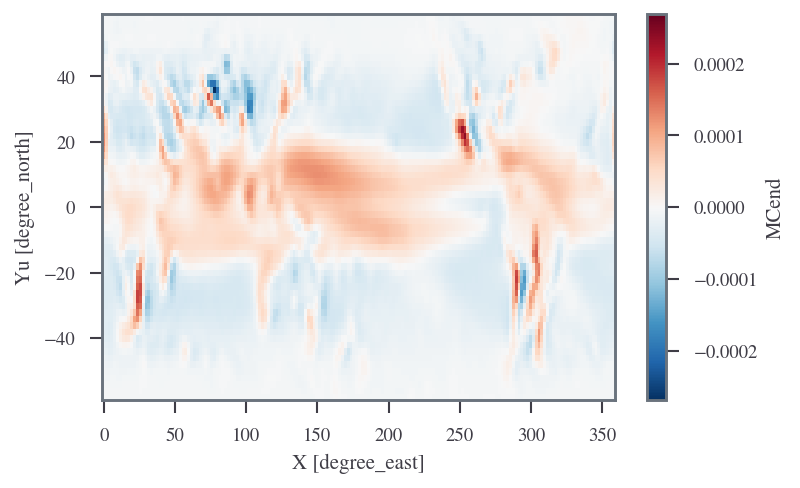

<xarray.DataArray 'qaend' (Yu: 59, X: 180)>
array([[0.002907, 0.002904, 0.002904, ..., 0.002938, 0.002923, 0.002914],
       [0.002975, 0.002971, 0.002965, ..., 0.003043, 0.003012, 0.002987],
       [0.003106, 0.003094, 0.003075, ..., 0.003162, 0.003138, 0.003112],
       ...,
       [0.006411, 0.006475, 0.006601, ..., 0.006636, 0.006637, 0.00655 ],
       [0.006252, 0.006265, 0.006279, ..., 0.006529, 0.006523, 0.006289],
       [0.00616 , 0.006128, 0.00613 , ..., 0.006421, 0.006326, 0.006161]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


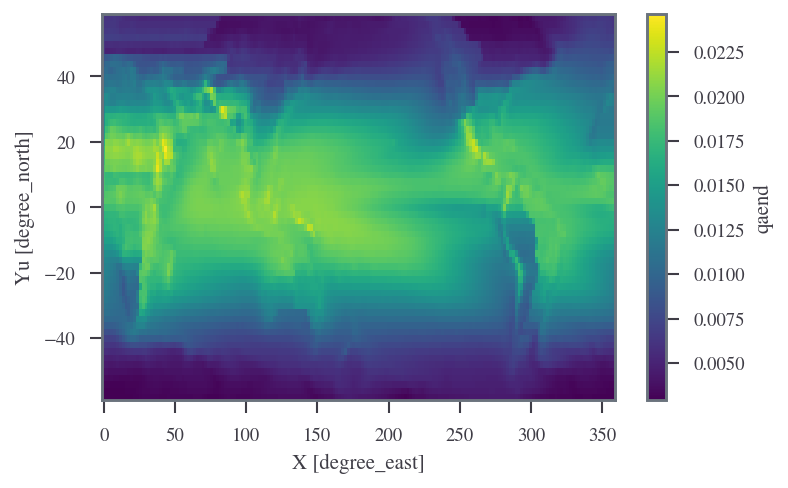

<xarray.DataArray 'ubeg' (Yu: 59, X: 180)>
array([[ 0.661729,  0.661066,  0.657166, ...,  0.658846,  0.661143,  0.663714],
       [-0.783191, -0.783942, -0.789719, ..., -0.777677, -0.779651, -0.777714],
       [-2.055683, -2.057447, -2.06944 , ..., -2.04932 , -2.051546, -2.048218],
       ...,
       [-2.293328, -2.285609, -2.303896, ..., -2.663286, -2.546423, -2.416491],
       [-1.515101, -1.534316, -1.554371, ..., -1.864024, -1.714767, -1.580459],
       [-0.753768, -0.778709, -0.769427, ..., -1.065855, -0.844619, -0.743545]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


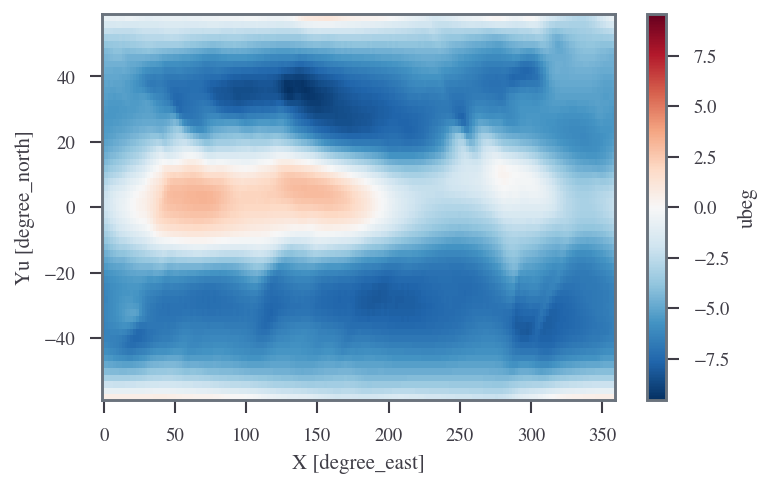

<xarray.DataArray 'wbeg' (Yu: 59, X: 180)>
array([[ 9.419524,  9.42322 ,  9.42478 , ...,  9.346466,  9.359971,  9.385437],
       [ 9.995323, 10.006735, 10.029243, ...,  9.906073,  9.926533,  9.951863],
       [10.451788, 10.45811 , 10.493629, ..., 10.308962, 10.350789, 10.391028],
       ...,
       [ 6.623406,  7.4361  ,  7.200084, ...,  6.593089,  6.348463,  5.369631],
       [ 7.893165,  7.913937,  8.017044, ...,  6.573031,  6.155467,  6.294631],
       [ 8.180008,  8.071959,  7.904267, ...,  7.047289,  6.441497,  7.331366]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


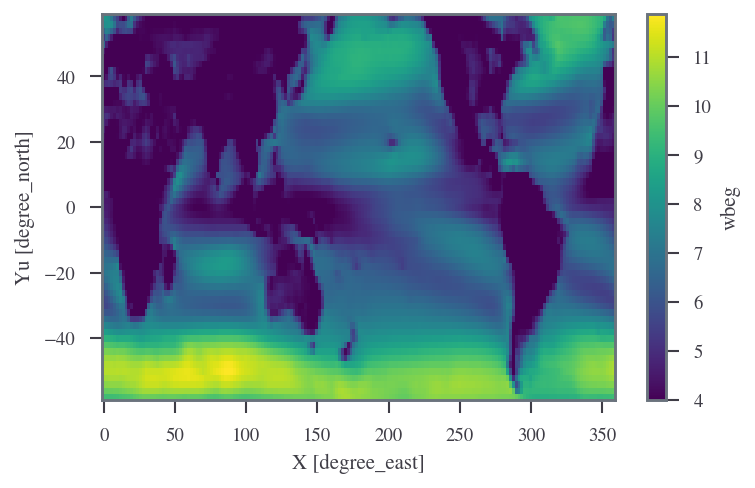

<xarray.DataArray 'phibeg' (Yu: 59, X: 180)>
array([[-43145.529214, -43145.05602 , -43155.494232, ..., -43125.321985,
        -43135.643599, -43135.114598],
       [-43148.209342, -43147.761163, -43158.369774, ..., -43127.914024,
        -43138.244366, -43137.660844],
       [-43194.147414, -43193.737294, -43204.649318, ..., -43173.590859,
        -43184.003723, -43183.374796],
       ...,
       [-43610.381823, -43606.647024, -43608.970402, ..., -43632.703953,
        -43622.489908, -43610.594554],
       [-43550.208007, -43546.246759, -43548.222099, ..., -43564.034606,
        -43557.180585, -43548.202916],
       [-43513.169215, -43508.653921, -43510.671782, ..., -43518.268608,
        -43516.655965, -43510.576644]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


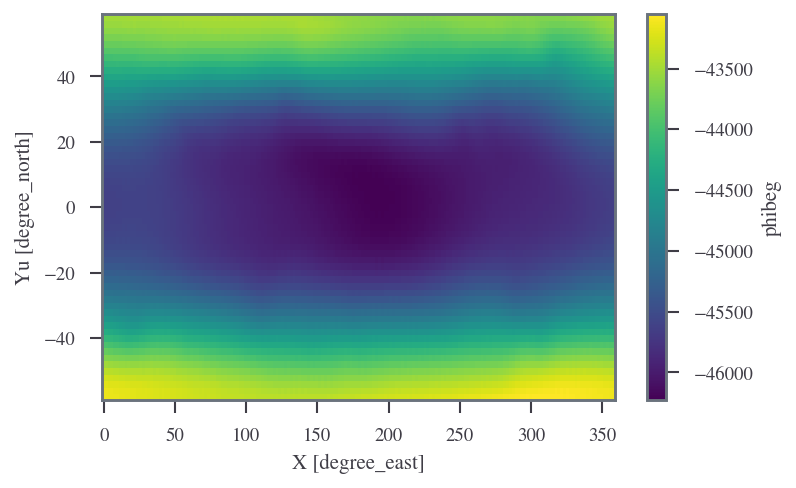

<xarray.DataArray 'tsbeg' (Yu: 59, X: 180)>
array([[272.754084, 272.767642, 272.782811, ..., 272.848021, 272.801014,
        272.762695],
       [273.237697, 273.270754, 273.233583, ..., 273.314954, 273.264745,
        273.222611],
       [274.134979, 274.197669, 274.103332, ..., 274.110574, 274.117978,
        274.082509],
       ...,
       [283.082636, 283.178154, 283.360662, ..., 283.892157, 283.743289,
        283.104183],
       [282.590959, 282.911741, 282.987075, ..., 283.598356, 283.142938,
        282.19692 ],
       [282.680791, 282.744597, 282.612445, ..., 283.48904 , 282.899492,
        282.499876]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


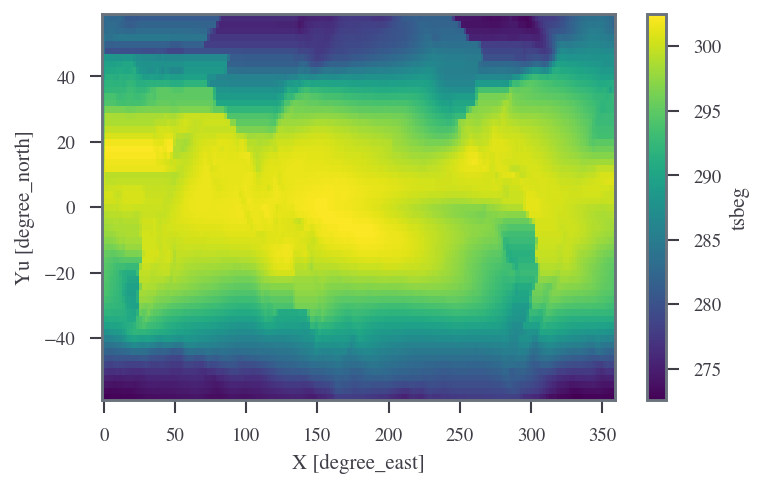

<xarray.DataArray 'PRbeg' (Yu: 59, X: 180)>
array([[7.943706e-06, 7.930645e-06, 7.937220e-06, ..., 7.954507e-06,
        7.933249e-06, 7.924462e-06],
       [8.947639e-06, 8.887821e-06, 8.766105e-06, ..., 8.838224e-06,
        8.796725e-06, 8.825989e-06],
       [9.903537e-06, 9.711268e-06, 9.383864e-06, ..., 9.895714e-06,
        9.643570e-06, 9.635512e-06],
       ...,
       [9.082415e-06, 1.431196e-05, 1.511010e-05, ..., 9.247996e-06,
        8.087450e-06, 3.818091e-06],
       [1.538749e-05, 1.725297e-05, 1.709095e-05, ..., 9.788666e-06,
        7.032226e-06, 7.256139e-06],
       [1.726188e-05, 1.737377e-05, 1.612294e-05, ..., 1.265848e-05,
        9.105458e-06, 1.231629e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


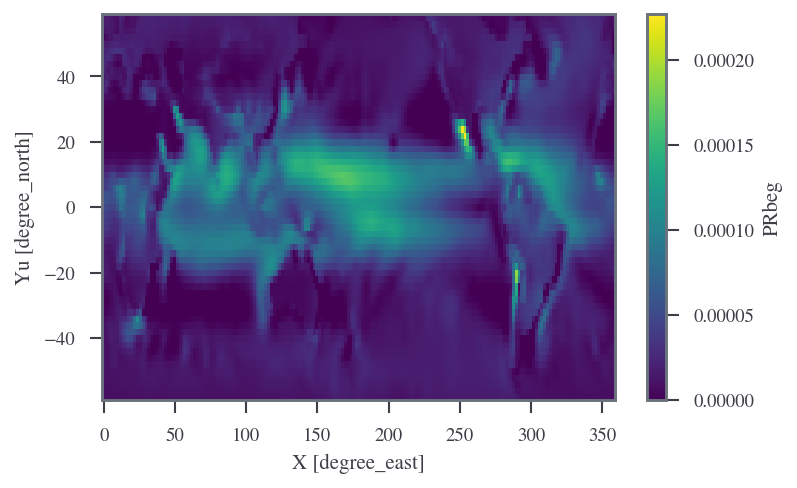

<xarray.DataArray 'Qthbeg' (Yu: 59, X: 180)>
array([[0.000281, 0.000281, 0.000281, ..., 0.000281, 0.000281, 0.000281],
       [0.000282, 0.000282, 0.000282, ..., 0.000282, 0.000282, 0.000282],
       [0.000283, 0.000283, 0.000283, ..., 0.000283, 0.000283, 0.000283],
       ...,
       [0.000293, 0.000293, 0.000293, ..., 0.000294, 0.000294, 0.000293],
       [0.000292, 0.000293, 0.000293, ..., 0.000294, 0.000293, 0.000292],
       [0.000292, 0.000293, 0.000292, ..., 0.000293, 0.000293, 0.000292]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


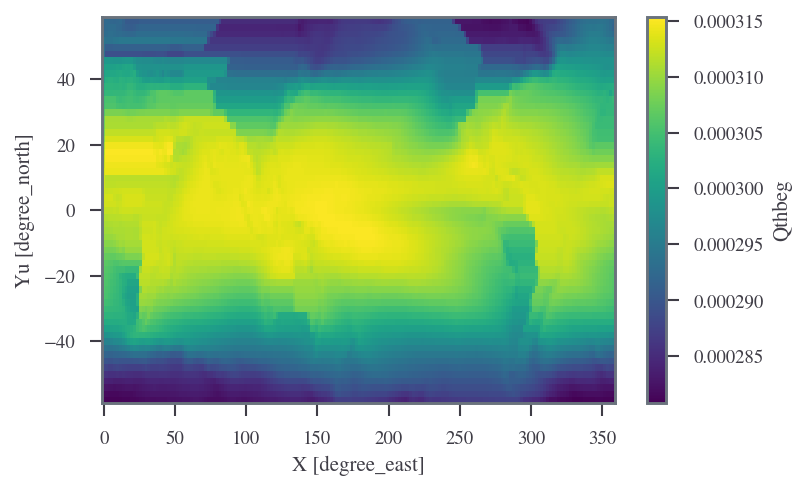

<xarray.DataArray 'Ebeg' (Yu: 59, X: 180)>
array([[1.293238e-05, 1.295191e-05, 1.297052e-05, ..., 1.291122e-05,
        1.288869e-05, 1.289062e-05],
       [1.417242e-05, 1.422390e-05, 1.421900e-05, ..., 1.411781e-05,
        1.409791e-05, 1.409279e-05],
       [1.576036e-05, 1.584206e-05, 1.578950e-05, ..., 1.551235e-05,
        1.558529e-05, 1.560759e-05],
       ...,
       [1.825715e-05, 2.060742e-05, 2.019385e-05, ..., 1.931292e-05,
        1.846705e-05, 1.505674e-05],
       [2.104961e-05, 2.156948e-05, 2.195731e-05, ..., 1.899182e-05,
        1.746234e-05, 1.654561e-05],
       [2.197855e-05, 2.177834e-05, 2.113365e-05, ..., 2.021034e-05,
        1.789406e-05, 1.956311e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


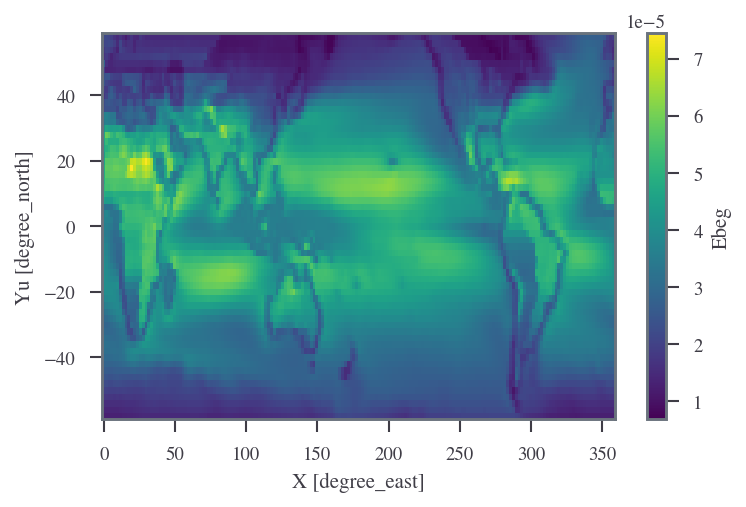

<xarray.DataArray 'MCbeg' (Yu: 59, X: 180)>
array([[-4.988672e-06, -5.021265e-06, -5.033303e-06, ..., -4.956711e-06,
        -4.955440e-06, -4.966156e-06],
       [-5.224776e-06, -5.336080e-06, -5.452896e-06, ..., -5.279587e-06,
        -5.301181e-06, -5.266806e-06],
       [-5.856827e-06, -6.130796e-06, -6.405636e-06, ..., -5.616640e-06,
        -5.941716e-06, -5.972079e-06],
       ...,
       [-9.174739e-06, -6.295461e-06, -5.083742e-06, ..., -1.006492e-05,
        -1.037960e-05, -1.123865e-05],
       [-5.662123e-06, -4.316510e-06, -4.866365e-06, ..., -9.203150e-06,
        -1.043011e-05, -9.289467e-06],
       [-4.716664e-06, -4.404572e-06, -5.010714e-06, ..., -7.551864e-06,
        -8.788607e-06, -7.246820e-06]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


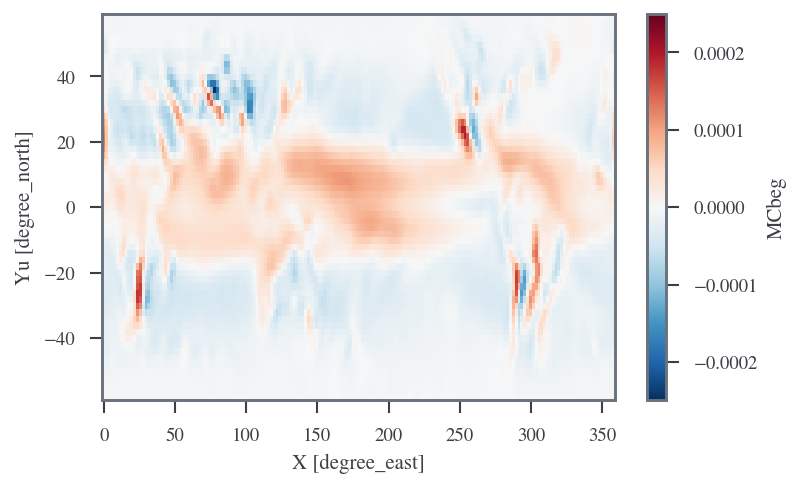

<xarray.DataArray 'qabeg' (Yu: 59, X: 180)>
array([[0.002989, 0.002992, 0.002996, ..., 0.003007, 0.002998, 0.00299 ],
       [0.003087, 0.003094, 0.003086, ..., 0.003102, 0.003092, 0.003083],
       [0.003283, 0.003298, 0.003275, ..., 0.003276, 0.003278, 0.00327 ],
       ...,
       [0.006   , 0.006033, 0.006105, ..., 0.006377, 0.006332, 0.006104],
       [0.005805, 0.005933, 0.005962, ..., 0.00629 , 0.006176, 0.005722],
       [0.005849, 0.005873, 0.00582 , ..., 0.006243, 0.006047, 0.005809]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


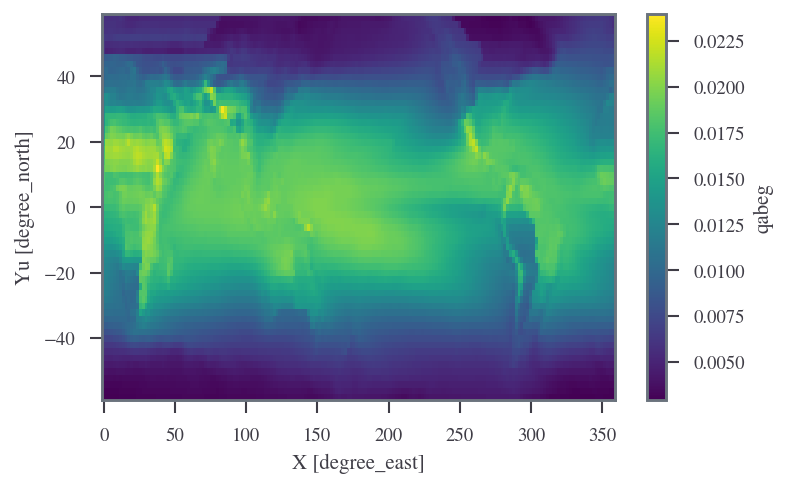

/home/users/sithom/seager19/atmos/tmp/S91-Hq1800-PrcpLand0.nc
<xarray.Dataset>
Dimensions:   (X: 180, Yu: 59, Yv: 60)
Coordinates:
  * X         (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu        (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
  * Yv        (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0
Data variables: (12/37)
    K         float32 ...
    epsu      float32 ...
    epsv      float32 ...
    Hq        float32 ...
    wnspClim  (Yu, X) float64 ...
    tsClim    (Yu, X) float64 ...
    ...        ...
    tsbeg     (Yu, X) float64 ...
    PRbeg     (Yu, X) float64 ...
    Qthbeg    (Yu, X) float64 ...
    Ebeg      (Yu, X) float64 ...
    MCbeg     (Yu, X) float64 ...
    qabeg     (Yu, X) float64 ...
<xarray.DataArray 'wnspClim' (Yu: 59, X: 180)>
array([[ 9.419524,  9.42322 ,  9.42478 , ...,  9.346466,  9.359971,  9.385437],
       [ 9.995323, 10.006735, 10.029243, ...,  9.906073,  9.926533,  9.951863],
 

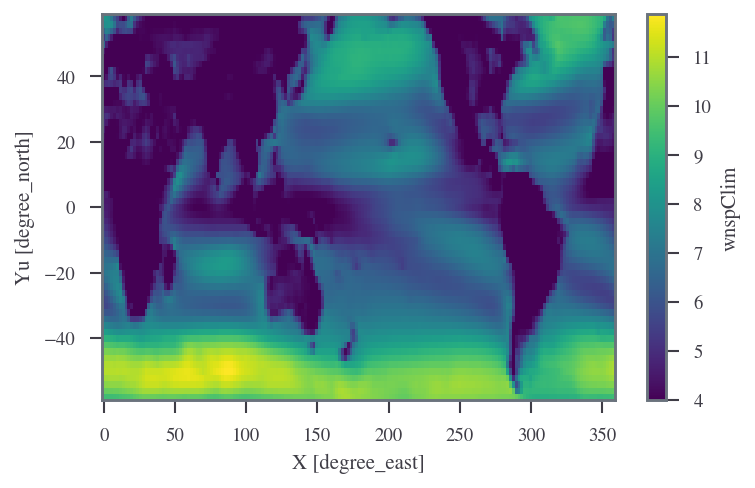

<xarray.DataArray 'tsClim' (Yu: 59, X: 180)>
array([[272.565002, 272.562531, 272.569366, ..., 272.687592, 272.62735 ,
        272.585632],
       [272.984009, 272.991272, 272.957336, ..., 273.181396, 273.084076,
        273.004944],
       [273.752655, 273.757446, 273.666016, ..., 273.865906, 273.815735,
        273.739319],
       ...,
       [283.578247, 283.708801, 283.947388, ..., 284.192169, 284.097351,
        283.633057],
       [283.144745, 283.31897 , 283.375122, ..., 283.878601, 283.55307 ,
        282.90152 ],
       [283.067169, 283.061432, 282.998901, ..., 283.699493, 283.236115,
        282.938477]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


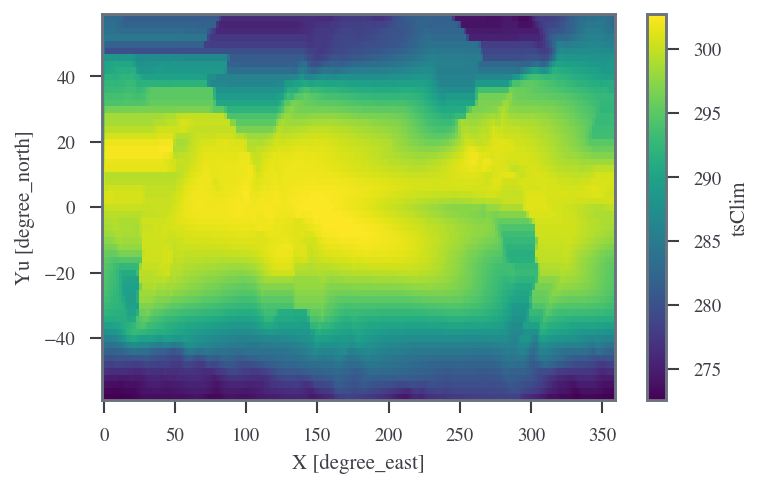

<xarray.DataArray 'prClim' (Yu: 59, X: 180)>
array([[2.423993e-05, 2.414862e-05, 2.409772e-05, ..., 2.429753e-05,
        2.421461e-05, 2.417900e-05],
       [2.701966e-05, 2.703372e-05, 2.713332e-05, ..., 2.717954e-05,
        2.704264e-05, 2.692798e-05],
       [2.999482e-05, 2.998919e-05, 3.011275e-05, ..., 2.982601e-05,
        2.981519e-05, 2.979843e-05],
       ...,
       [1.763721e-05, 2.014634e-05, 2.248650e-05, ..., 2.939861e-05,
        2.690058e-05, 2.223652e-05],
       [2.056877e-05, 2.247714e-05, 2.464496e-05, ..., 3.280054e-05,
        2.868401e-05, 2.255826e-05],
       [2.510050e-05, 2.701886e-05, 3.099499e-05, ..., 3.481709e-05,
        2.991775e-05, 2.420902e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


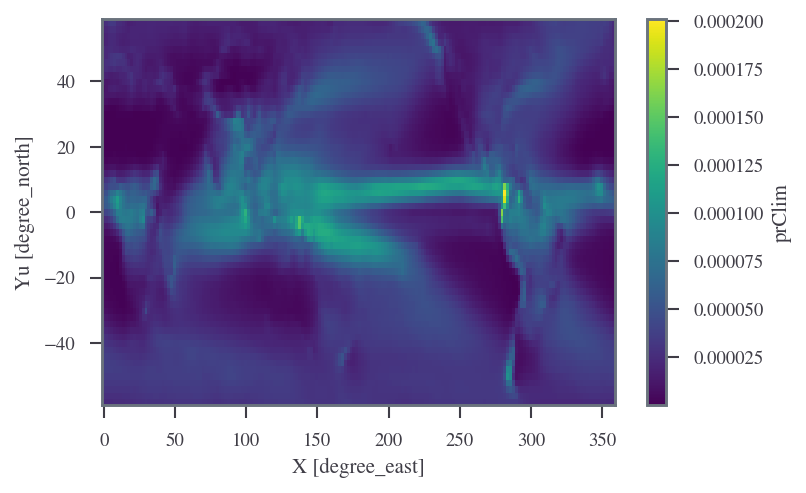

<xarray.DataArray 'spClim' (Yu: 59, X: 180)>
array([[ 988.420532,  988.292175,  988.127808, ...,  989.100403,  988.872986,
         988.653748],
       [ 991.299072,  991.211456,  991.108612, ...,  991.786438,  991.62262 ,
         991.479919],
       [ 994.558105,  994.504059,  994.428711, ...,  994.901367,  994.793579,
         994.690063],
       ...,
       [1012.742798, 1013.795654, 1014.026367, ..., 1005.932007, 1002.980927,
         996.990967],
       [1012.80426 , 1012.577972, 1012.755554, ..., 1000.054443,  988.014709,
        1000.643921],
       [1011.33728 , 1011.479797, 1011.656372, ..., 1000.239655,  992.650818,
        1006.014496]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


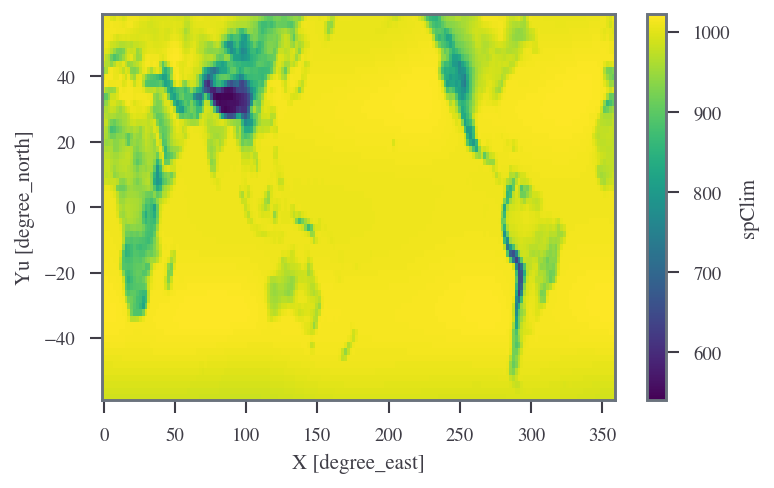

<xarray.DataArray 'tsTrend' (Yu: 59, X: 180)>
array([[-0.378164, -0.410222, -0.426889, ..., -0.320859, -0.347328, -0.354125],
       [-0.507376, -0.558964, -0.552493, ..., -0.267115, -0.361338, -0.435335],
       [-0.764647, -0.880446, -0.874632, ..., -0.489336, -0.604485, -0.68638 ],
       ...,
       [ 0.991223,  1.061296,  1.173451, ...,  0.600023,  0.708124,  1.057747],
       [ 1.107572,  0.814458,  0.776095, ...,  0.560491,  0.820263,  1.4092  ],
       [ 0.772756,  0.633669,  0.772913, ...,  0.420907,  0.673245,  0.877202]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


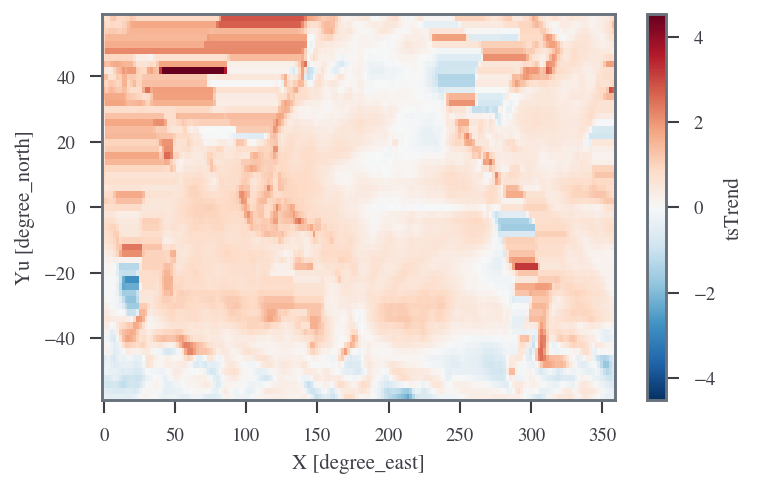

<xarray.DataArray 'prTrend' (Yu: 59, X: 180)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


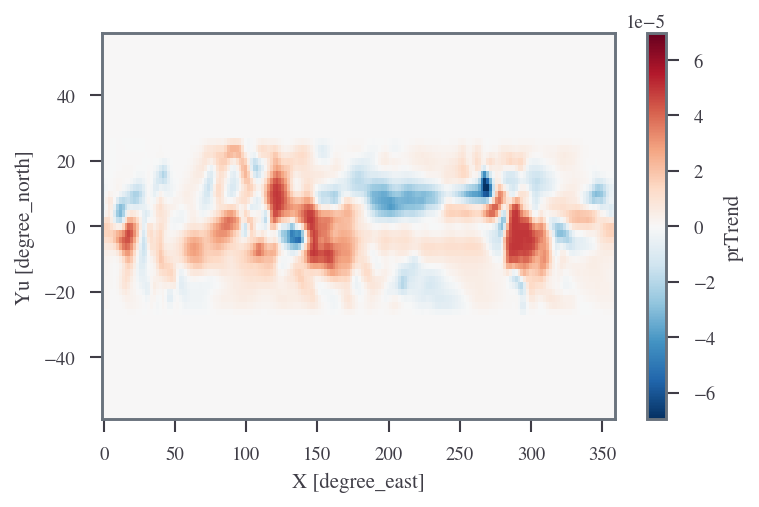

<xarray.DataArray 'mask' (Yu: 59, X: 180)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


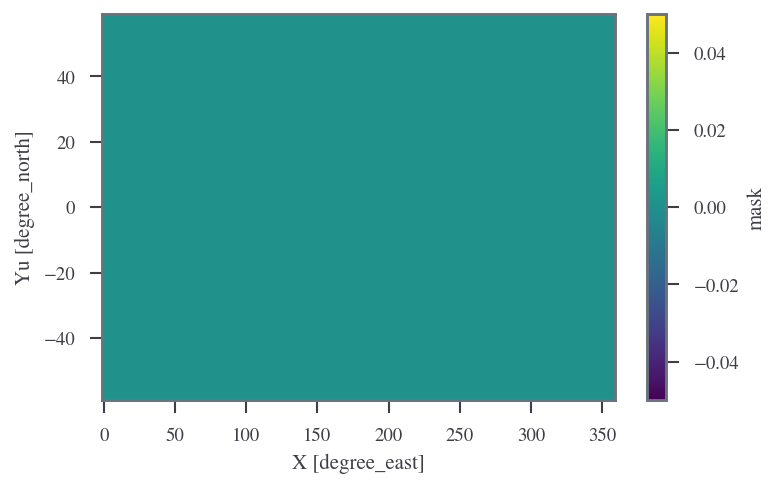

<xarray.DataArray 'utrend' (Yu: 59, X: 180)>
array([[ 0.095256,  0.077389,  0.059485, ...,  0.149066,  0.132142,  0.113738],
       [-0.008112, -0.027229, -0.049075, ...,  0.069736,  0.040755,  0.014706],
       [-0.12886 , -0.148963, -0.171934, ..., -0.001342, -0.052678, -0.095784],
       ...,
       [-0.297328, -0.34184 , -0.35974 , ..., -0.170422, -0.209713, -0.254261],
       [-0.302036, -0.323549, -0.333117, ..., -0.170716, -0.220624, -0.269073],
       [-0.252494, -0.271353, -0.302575, ..., -0.154573, -0.214868, -0.246159]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    m/s


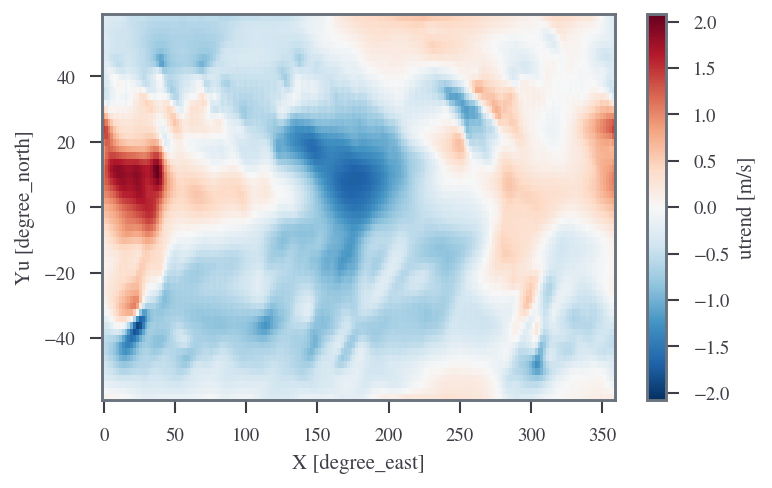

<xarray.DataArray 'vtrend' (Yv: 60, X: 180)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.028993,  0.029155,  0.02833 , ...,  0.024983,  0.028981,  0.029264],
       [ 0.062397,  0.062748,  0.062858, ...,  0.062819,  0.069001,  0.066061],
       ...,
       [-0.054694, -0.059763, -0.038234, ..., -0.125461, -0.087837, -0.054499],
       [-0.019786, -0.037592, -0.028185, ..., -0.072445, -0.046332, -0.016397],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yv       (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0
Attributes:
    units:    m/s


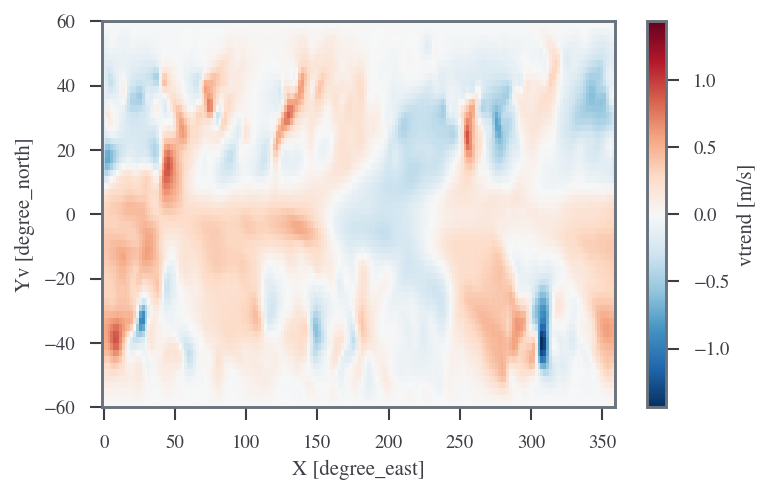

<xarray.DataArray 'phitrend' (Yu: 59, X: 180)>
array([[-170.541443, -171.313059, -172.014986, ..., -167.901307, -168.813547,
        -169.705784],
       [-169.292998, -170.685964, -171.989164, ..., -164.571052, -166.193416,
        -167.799043],
       [-171.756085, -173.838424, -175.809311, ..., -163.96075 , -166.76707 ,
        -169.427512],
       ...,
       [-359.838227, -360.969134, -361.527456, ..., -353.158242, -356.320074,
        -358.382713],
       [-350.189477, -350.430083, -350.495613, ..., -347.105107, -349.012793,
        -349.890528],
       [-341.116404, -340.660147, -340.145698, ..., -341.503795, -341.821858,
        -341.602252]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    m2/s2


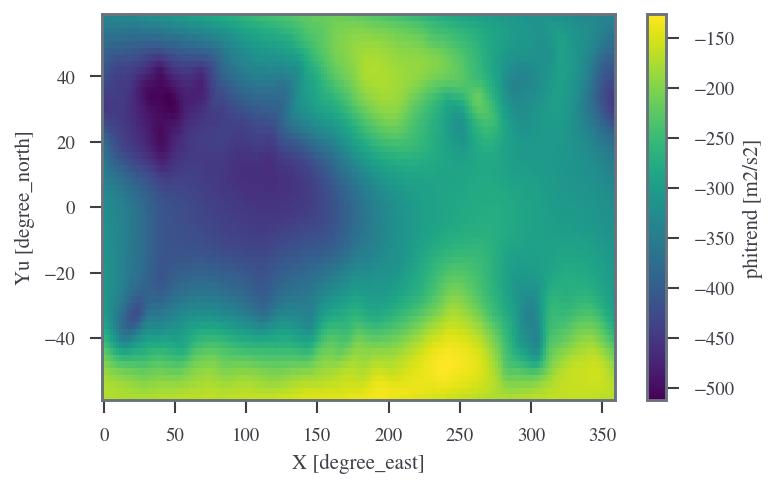

<xarray.DataArray 'tstrend' (Yu: 59, X: 180)>
array([[-0.378164, -0.410222, -0.426889, ..., -0.320859, -0.347328, -0.354125],
       [-0.507376, -0.558964, -0.552493, ..., -0.267115, -0.361338, -0.435335],
       [-0.764647, -0.880446, -0.874632, ..., -0.489336, -0.604485, -0.68638 ],
       ...,
       [ 0.991223,  1.061296,  1.173451, ...,  0.600023,  0.708124,  1.057747],
       [ 1.107572,  0.814458,  0.776095, ...,  0.560491,  0.820263,  1.4092  ],
       [ 0.772756,  0.633669,  0.772913, ...,  0.420907,  0.673245,  0.877202]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


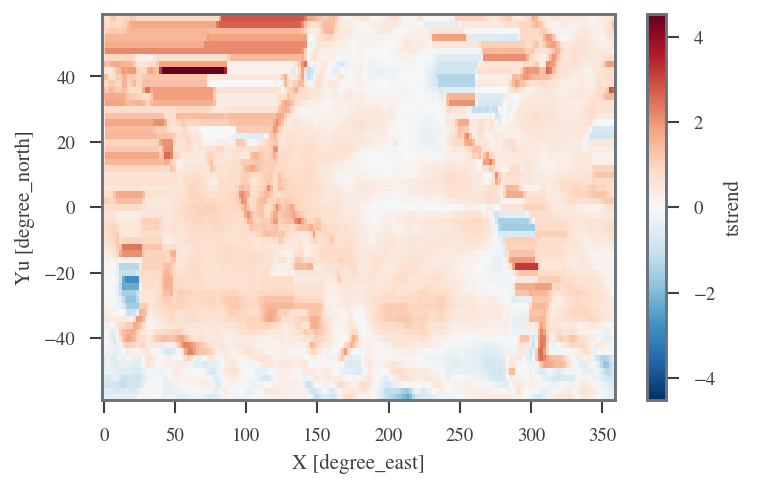

<xarray.DataArray 'PRtrend' (Yu: 59, X: 180)>
array([[-5.075113e-07, -5.115928e-07, -5.297236e-07, ..., -5.051273e-07,
        -5.221500e-07, -5.121682e-07],
       [-8.678720e-07, -8.322074e-07, -7.194162e-07, ..., -6.948710e-07,
        -7.197379e-07, -7.803048e-07],
       [-1.417955e-06, -1.660906e-06, -1.308103e-06, ..., -1.291324e-06,
        -1.020250e-06, -1.027325e-06],
       ...,
       [ 1.740189e-06,  2.538846e-06,  2.327568e-06, ...,  2.991489e-06,
         3.466875e-06,  2.394685e-06],
       [-4.349694e-07,  1.807047e-07,  1.849362e-06, ...,  2.539516e-06,
         3.675533e-06,  2.094601e-06],
       [-7.865909e-07, -2.291973e-08,  2.360975e-06, ...,  1.693805e-06,
         2.514625e-06,  1.084906e-06]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    m/s


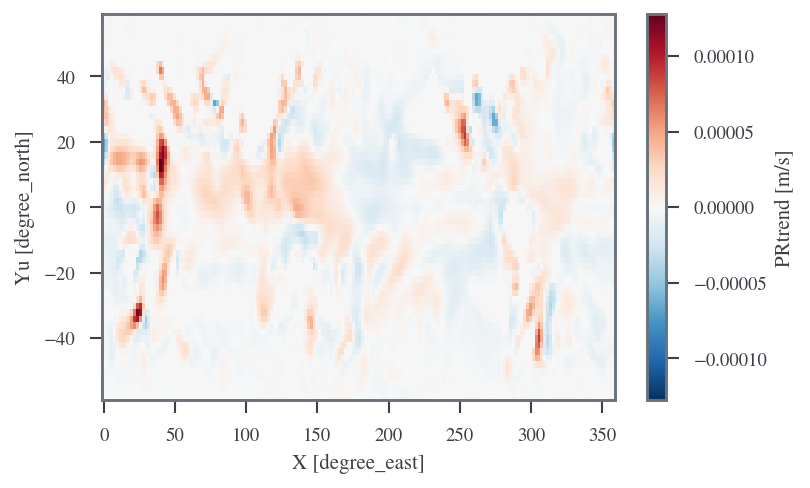

<xarray.DataArray 'Qthtrend' (Yu: 59, X: 180)>
array([[-4.376898e-07, -4.747943e-07, -4.940848e-07, ..., -3.713644e-07,
        -4.019996e-07, -4.098666e-07],
       [-5.872408e-07, -6.469493e-07, -6.394590e-07, ..., -3.091609e-07,
        -4.182154e-07, -5.038602e-07],
       [-8.850080e-07, -1.019034e-06, -1.012306e-06, ..., -5.663609e-07,
        -6.996359e-07, -7.944208e-07],
       ...,
       [ 1.147249e-06,  1.228351e-06,  1.358161e-06, ...,  6.944715e-07,
         8.195884e-07,  1.224244e-06],
       [ 1.281912e-06,  9.426599e-07,  8.982580e-07, ...,  6.487164e-07,
         9.493789e-07,  1.631019e-06],
       [ 8.943932e-07,  7.334135e-07,  8.945749e-07, ...,  4.871612e-07,
         7.792184e-07,  1.015280e-06]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
Attributes:
    units:    K/s


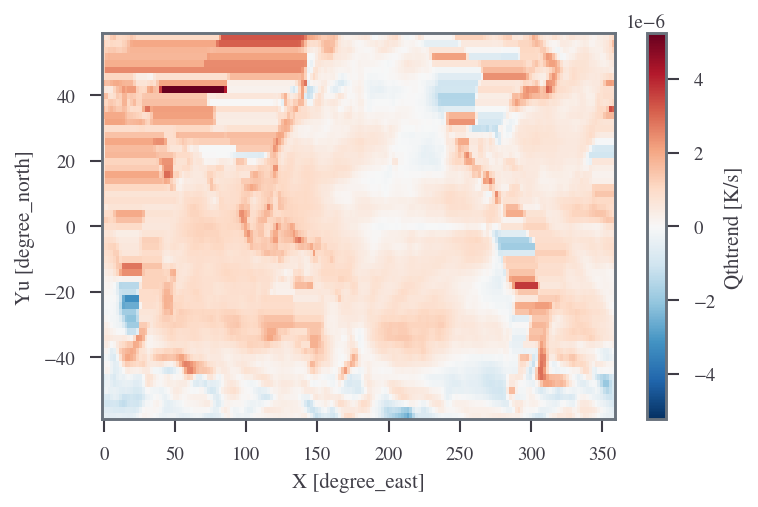

<xarray.DataArray 'uend' (Yu: 59, X: 180)>
array([[ 0.582077,  0.542501,  0.49909 , ...,  0.694315,  0.659824,  0.623767],
       [-0.983736, -1.024657, -1.074781, ..., -0.838186, -0.889469, -0.933528],
       [-2.390716, -2.434573, -2.494079, ..., -2.192132, -2.266815, -2.326863],
       ...,
       [-3.595317, -3.523766, -3.502774, ..., -4.096775, -3.97054 , -3.772314],
       [-2.859404, -2.816444, -2.770536, ..., -3.296057, -3.140235, -2.967306],
       [-2.152361, -2.130418, -2.066025, ..., -2.530015, -2.30477 , -2.181146]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


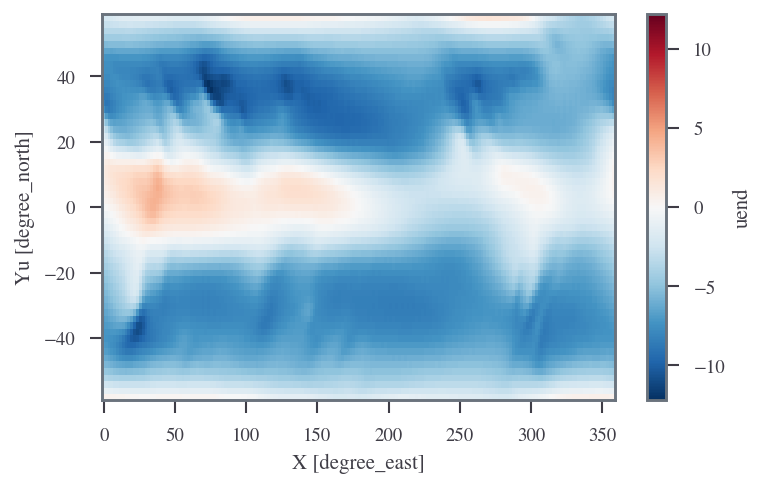

<xarray.DataArray 'vend' (Yv: 60, X: 180)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.21791 ,  0.218503,  0.220055, ...,  0.204971,  0.212045,  0.215622],
       [ 0.435776,  0.436427,  0.441234, ...,  0.420723,  0.431266,  0.435001],
       ...,
       [-0.073965, -0.051457,  0.020444, ...,  0.212058,  0.13911 ,  0.012383],
       [-0.059623, -0.024614,  0.026471, ...,  0.169794,  0.075838, -0.028081],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yv       (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0


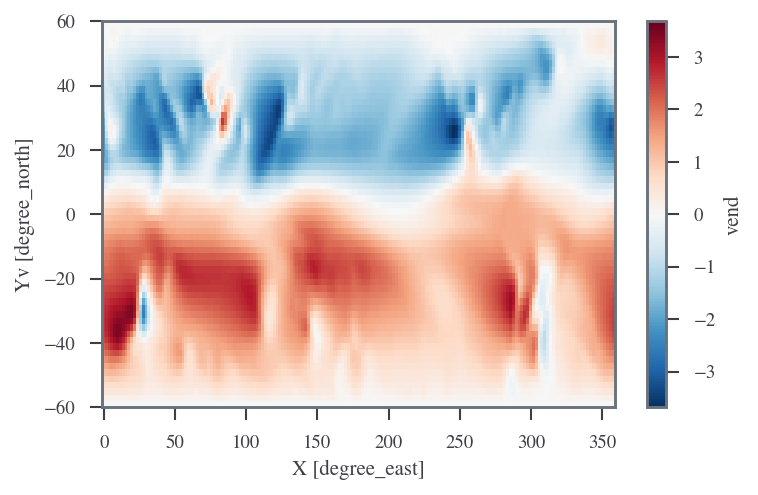

<xarray.DataArray 'wend' (Yu: 59, X: 180)>
array([[ 9.419524,  9.42322 ,  9.42478 , ...,  9.346466,  9.359971,  9.385437],
       [ 9.995323, 10.006735, 10.029243, ...,  9.906073,  9.926533,  9.951863],
       [10.451788, 10.45811 , 10.493629, ..., 10.308962, 10.350789, 10.391028],
       ...,
       [ 6.623406,  7.4361  ,  7.200084, ...,  6.593089,  6.348463,  5.369631],
       [ 7.893165,  7.913937,  8.017044, ...,  6.573031,  6.155467,  6.294631],
       [ 8.180008,  8.071959,  7.904267, ...,  7.047289,  6.441497,  7.331366]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


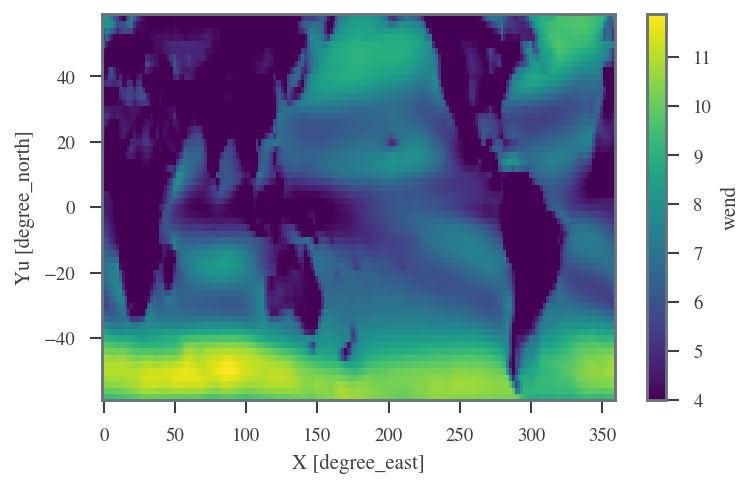

<xarray.DataArray 'phiend' (Yu: 59, X: 180)>
array([[-43372.017917, -43368.987013, -43382.896337, ..., -43346.417078,
        -43360.691198, -43357.865852],
       [-43379.532819, -43377.800531, -43393.223281, ..., -43349.705651,
        -43365.403384, -43363.889139],
       [-43434.505261, -43434.092559, -43451.247356, ..., -43399.248062,
        -43416.966791, -43417.089654],
       ...,
       [-43663.26848 , -43652.856981, -43642.561194, ..., -43711.673835,
        -43692.552747, -43675.024821],
       [-43562.777146, -43554.289513, -43545.532642, ..., -43598.602195,
        -43583.36697 , -43570.723327],
       [-43481.945074, -43474.735856, -43468.109147, ..., -43506.261778,
        -43496.531434, -43487.931227]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


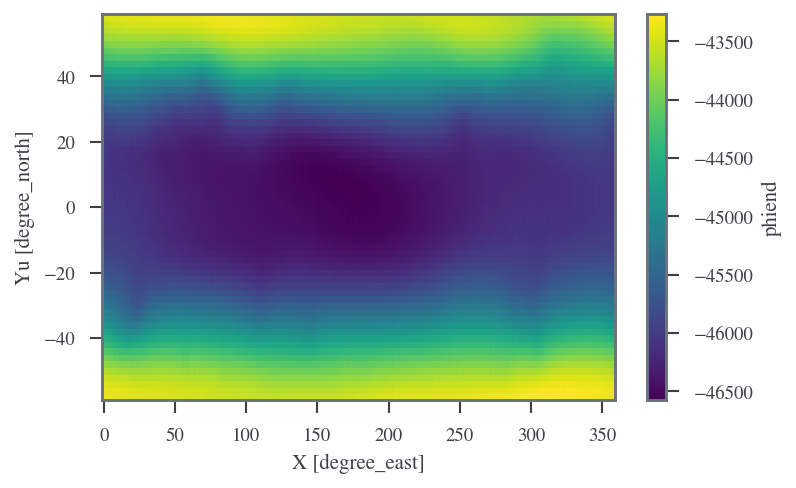

<xarray.DataArray 'tsend' (Yu: 59, X: 180)>
array([[272.37592 , 272.357419, 272.355922, ..., 272.527162, 272.453686,
        272.40857 ],
       [272.730321, 272.71179 , 272.68109 , ..., 273.047839, 272.903407,
        272.787276],
       [273.370332, 273.317223, 273.228699, ..., 273.621238, 273.513492,
        273.396129],
       ...,
       [284.073858, 284.239449, 284.534113, ..., 284.492181, 284.451413,
        284.16193 ],
       [283.698531, 283.726199, 283.76317 , ..., 284.158847, 283.963202,
        283.60612 ],
       [283.453547, 283.378267, 283.385358, ..., 283.909947, 283.572737,
        283.377077]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


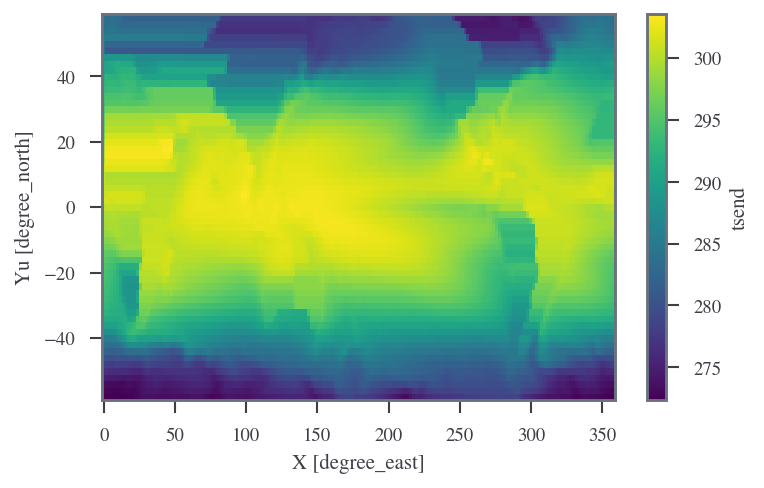

<xarray.DataArray 'PRend' (Yu: 59, X: 180)>
array([[7.338315e-06, 7.321700e-06, 7.309542e-06, ..., 7.338587e-06,
        7.299259e-06, 7.306365e-06],
       [7.923119e-06, 7.884260e-06, 7.859584e-06, ..., 7.979575e-06,
        7.906457e-06, 7.881082e-06],
       [8.194261e-06, 7.728548e-06, 7.724758e-06, ..., 8.341362e-06,
        8.329628e-06, 8.312384e-06],
       ...,
       [1.142716e-05, 1.796936e-05, 1.829750e-05, ..., 1.128459e-05,
        1.099946e-05, 5.906774e-06],
       [1.643159e-05, 1.928795e-05, 2.034695e-05, ..., 1.085678e-05,
        8.829173e-06, 8.635334e-06],
       [1.777751e-05, 1.872765e-05, 1.954401e-05, ..., 1.293906e-05,
        9.497912e-06, 1.269779e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


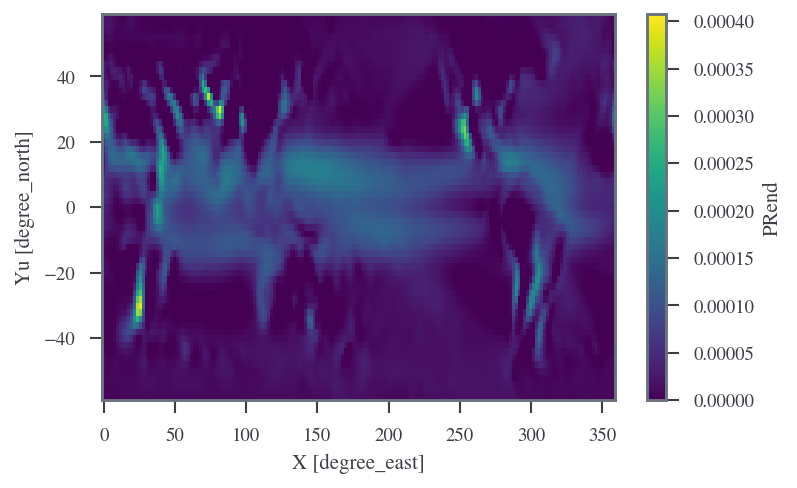

<xarray.DataArray 'Qthend' (Yu: 59, X: 180)>
array([[0.000281, 0.000281, 0.000281, ..., 0.000281, 0.000281, 0.000281],
       [0.000281, 0.000281, 0.000281, ..., 0.000281, 0.000281, 0.000281],
       [0.000282, 0.000282, 0.000282, ..., 0.000282, 0.000282, 0.000282],
       ...,
       [0.000294, 0.000294, 0.000295, ..., 0.000295, 0.000295, 0.000294],
       [0.000294, 0.000294, 0.000294, ..., 0.000294, 0.000294, 0.000294],
       [0.000293, 0.000293, 0.000293, ..., 0.000294, 0.000293, 0.000293]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


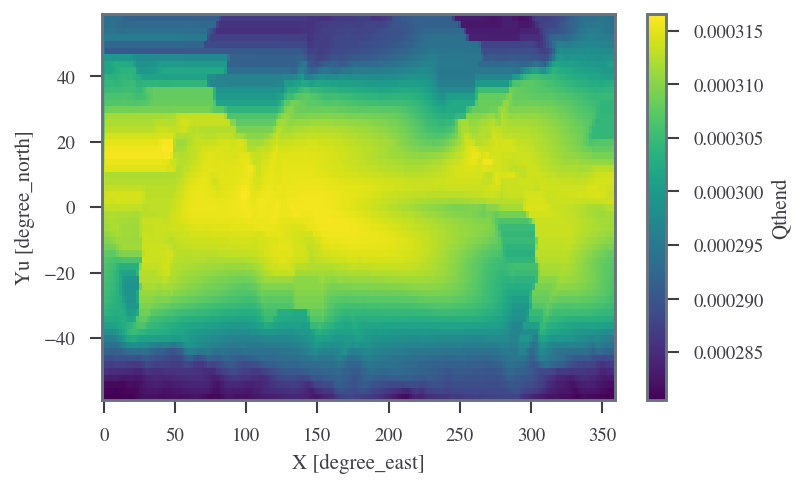

<xarray.DataArray 'Eend' (Yu: 59, X: 180)>
array([[1.258065e-05, 1.257022e-05, 1.257302e-05, ..., 1.261295e-05,
        1.256653e-05, 1.256208e-05],
       [1.365941e-05, 1.365777e-05, 1.365933e-05, ..., 1.384686e-05,
        1.373285e-05, 1.365403e-05],
       [1.491375e-05, 1.486627e-05, 1.482247e-05, ..., 1.497430e-05,
        1.491997e-05, 1.485281e-05],
       ...,
       [1.950558e-05, 2.211813e-05, 2.183369e-05, ..., 2.009800e-05,
        1.935688e-05, 1.615739e-05],
       [2.267000e-05, 2.277671e-05, 2.312632e-05, ..., 1.971384e-05,
        1.844499e-05, 1.818612e-05],
       [2.314642e-05, 2.272288e-05, 2.225749e-05, ..., 2.078547e-05,
        1.871856e-05, 2.074856e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


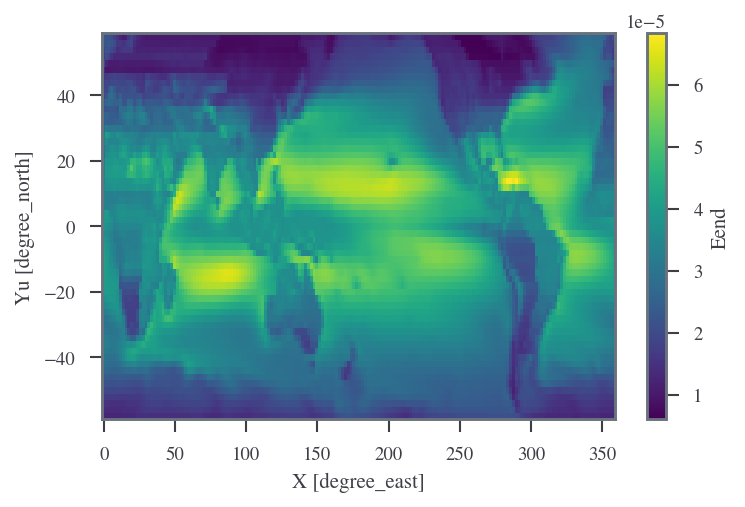

<xarray.DataArray 'MCend' (Yu: 59, X: 180)>
array([[-5.242332e-06, -5.248520e-06, -5.263475e-06, ..., -5.274364e-06,
        -5.267273e-06, -5.255712e-06],
       [-5.736290e-06, -5.773509e-06, -5.799749e-06, ..., -5.867285e-06,
        -5.826396e-06, -5.772953e-06],
       [-6.719492e-06, -7.137723e-06, -7.097707e-06, ..., -6.632933e-06,
        -6.590341e-06, -6.540427e-06],
       ...,
       [-8.078419e-06, -4.148765e-06, -3.536184e-06, ..., -8.813412e-06,
        -8.357417e-06, -1.025062e-05],
       [-6.238408e-06, -3.488760e-06, -2.779369e-06, ..., -8.857052e-06,
        -9.615816e-06, -9.550789e-06],
       [-5.368913e-06, -3.995231e-06, -2.713476e-06, ..., -7.846406e-06,
        -9.220643e-06, -8.050765e-06]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


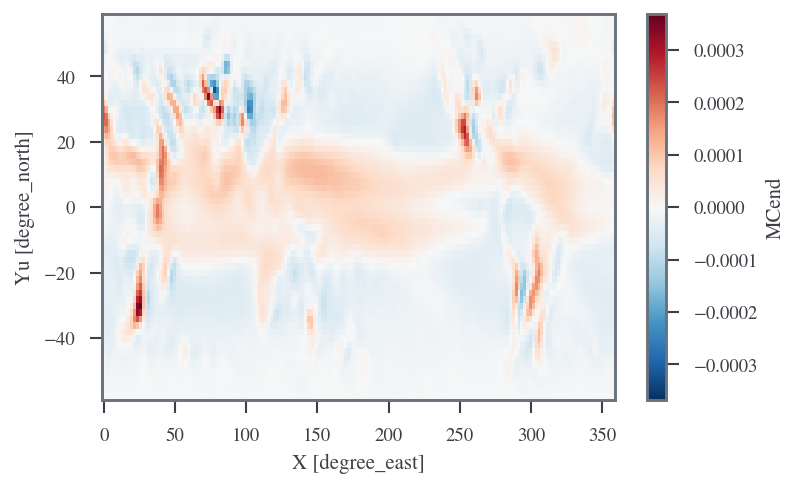

<xarray.DataArray 'qaend' (Yu: 59, X: 180)>
array([[0.002907, 0.002904, 0.002904, ..., 0.002938, 0.002923, 0.002914],
       [0.002975, 0.002971, 0.002965, ..., 0.003043, 0.003012, 0.002987],
       [0.003106, 0.003094, 0.003075, ..., 0.003162, 0.003138, 0.003112],
       ...,
       [0.006411, 0.006475, 0.006601, ..., 0.006636, 0.006637, 0.00655 ],
       [0.006252, 0.006265, 0.006279, ..., 0.006529, 0.006523, 0.006289],
       [0.00616 , 0.006128, 0.00613 , ..., 0.006421, 0.006326, 0.006161]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


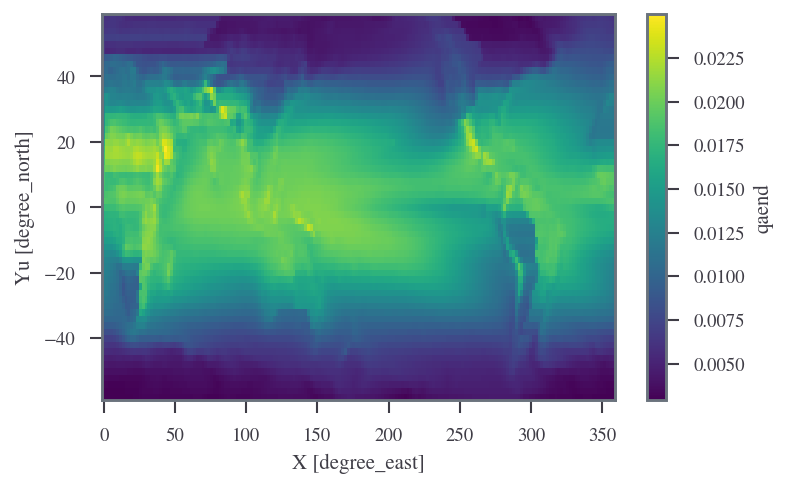

<xarray.DataArray 'ubeg' (Yu: 59, X: 180)>
array([[ 0.486821,  0.465112,  0.439606, ...,  0.545249,  0.527683,  0.510029],
       [-0.975624, -0.997427, -1.025707, ..., -0.907922, -0.930223, -0.948234],
       [-2.261856, -2.28561 , -2.322145, ..., -2.190791, -2.214137, -2.23108 ],
       ...,
       [-3.29799 , -3.181927, -3.143034, ..., -3.926352, -3.760828, -3.518054],
       [-2.557369, -2.492895, -2.43742 , ..., -3.125341, -2.91961 , -2.698233],
       [-1.899867, -1.859065, -1.76345 , ..., -2.375442, -2.089901, -1.934986]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


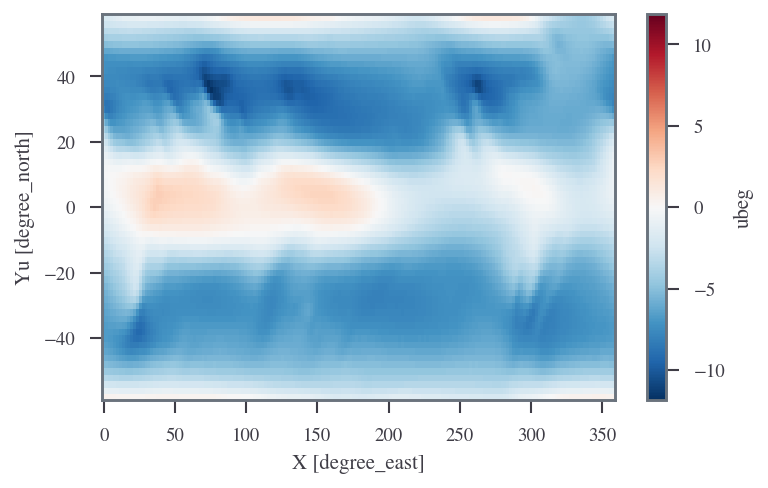

<xarray.DataArray 'vbeg' (Yv: 60, X: 180)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.188916,  0.189347,  0.191724, ...,  0.179988,  0.183065,  0.186359],
       [ 0.373379,  0.373678,  0.378376, ...,  0.357905,  0.362264,  0.36894 ],
       ...,
       [-0.019271,  0.008306,  0.058678, ...,  0.337519,  0.226947,  0.066883],
       [-0.039837,  0.012978,  0.054656, ...,  0.242239,  0.12217 , -0.011685],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yv       (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0


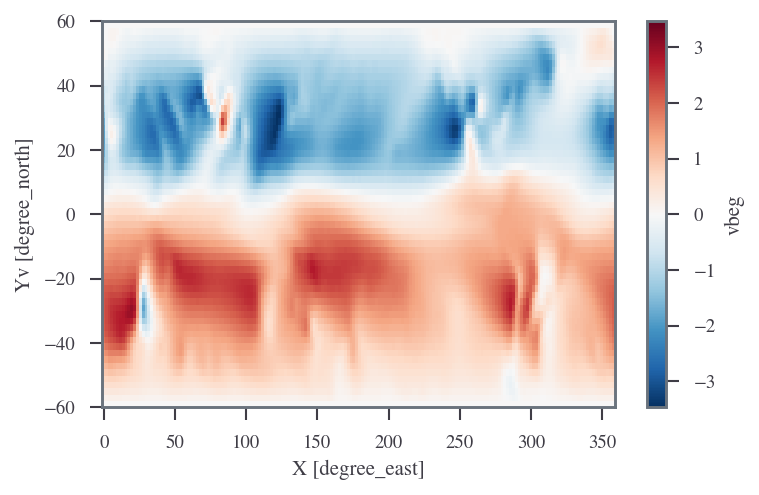

<xarray.DataArray 'wbeg' (Yu: 59, X: 180)>
array([[ 9.419524,  9.42322 ,  9.42478 , ...,  9.346466,  9.359971,  9.385437],
       [ 9.995323, 10.006735, 10.029243, ...,  9.906073,  9.926533,  9.951863],
       [10.451788, 10.45811 , 10.493629, ..., 10.308962, 10.350789, 10.391028],
       ...,
       [ 6.623406,  7.4361  ,  7.200084, ...,  6.593089,  6.348463,  5.369631],
       [ 7.893165,  7.913937,  8.017044, ...,  6.573031,  6.155467,  6.294631],
       [ 8.180008,  8.071959,  7.904267, ...,  7.047289,  6.441497,  7.331366]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


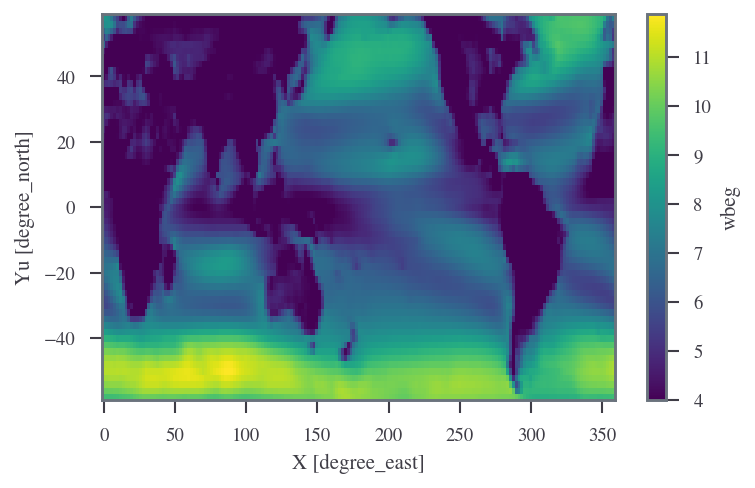

<xarray.DataArray 'phibeg' (Yu: 59, X: 180)>
array([[-43200.519134, -43198.59972 , -43209.917469, ..., -43179.468855,
        -43190.928673, -43189.084939],
       [-43209.266088, -43208.049569, -43220.24808 , ..., -43186.128159,
        -43198.249082, -43197.00157 ],
       [-43261.718287, -43261.210427, -43274.444898, ..., -43236.321147,
        -43249.180239, -43248.521393],
       ...,
       [-43305.299228, -43289.833705, -43282.700462, ..., -43356.343358,
        -43337.773402, -43314.633693],
       [-43214.488015, -43201.999516, -43196.681437, ..., -43249.428036,
        -43235.873288, -43218.833679],
       [-43142.698267, -43132.259093, -43129.668891, ..., -43162.81304 ,
        -43156.359704, -43144.435991]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


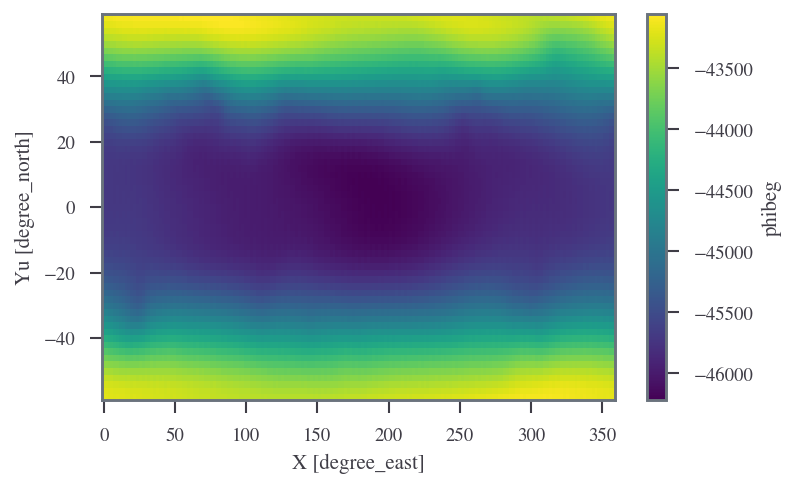

<xarray.DataArray 'tsbeg' (Yu: 59, X: 180)>
array([[272.754084, 272.767642, 272.782811, ..., 272.848021, 272.801014,
        272.762695],
       [273.237697, 273.270754, 273.233583, ..., 273.314954, 273.264745,
        273.222611],
       [274.134979, 274.197669, 274.103332, ..., 274.110574, 274.117978,
        274.082509],
       ...,
       [283.082636, 283.178154, 283.360662, ..., 283.892157, 283.743289,
        283.104183],
       [282.590959, 282.911741, 282.987075, ..., 283.598356, 283.142938,
        282.19692 ],
       [282.680791, 282.744597, 282.612445, ..., 283.48904 , 282.899492,
        282.499876]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


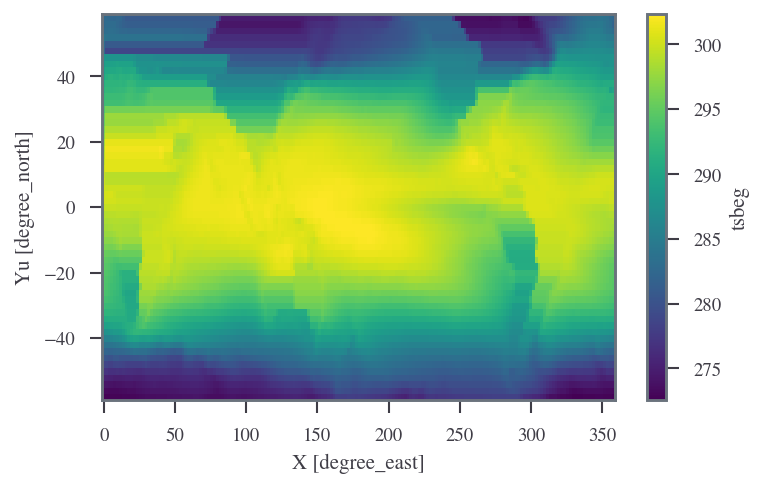

<xarray.DataArray 'PRbeg' (Yu: 59, X: 180)>
array([[7.845826e-06, 7.833293e-06, 7.839266e-06, ..., 7.843714e-06,
        7.821409e-06, 7.818533e-06],
       [8.790991e-06, 8.716468e-06, 8.579000e-06, ..., 8.674446e-06,
        8.626195e-06, 8.661387e-06],
       [9.612215e-06, 9.389454e-06, 9.032860e-06, ..., 9.632686e-06,
        9.349879e-06, 9.339708e-06],
       ...,
       [9.686969e-06, 1.543052e-05, 1.596994e-05, ..., 8.293097e-06,
        7.532585e-06, 3.512089e-06],
       [1.686656e-05, 1.910724e-05, 1.849759e-05, ..., 8.317268e-06,
        5.153640e-06, 6.540733e-06],
       [1.856410e-05, 1.875057e-05, 1.718304e-05, ..., 1.124526e-05,
        6.983287e-06, 1.161288e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


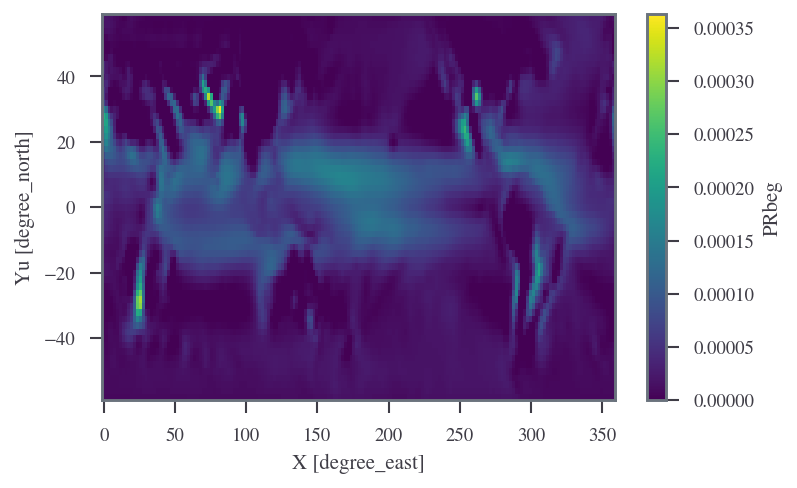

<xarray.DataArray 'Qthbeg' (Yu: 59, X: 180)>
array([[0.000281, 0.000281, 0.000281, ..., 0.000281, 0.000281, 0.000281],
       [0.000282, 0.000282, 0.000282, ..., 0.000282, 0.000282, 0.000282],
       [0.000283, 0.000283, 0.000283, ..., 0.000283, 0.000283, 0.000283],
       ...,
       [0.000293, 0.000293, 0.000293, ..., 0.000294, 0.000294, 0.000293],
       [0.000292, 0.000293, 0.000293, ..., 0.000294, 0.000293, 0.000292],
       [0.000292, 0.000293, 0.000292, ..., 0.000293, 0.000293, 0.000292]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


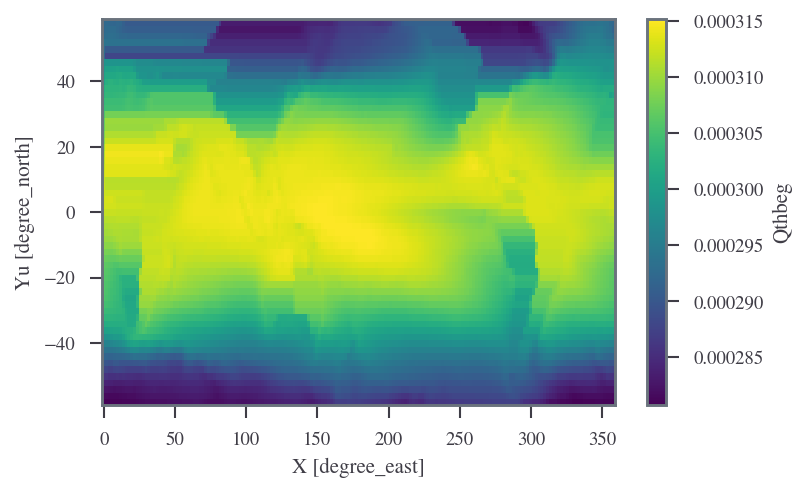

<xarray.DataArray 'Ebeg' (Yu: 59, X: 180)>
array([[1.293238e-05, 1.295191e-05, 1.297052e-05, ..., 1.291122e-05,
        1.288869e-05, 1.289062e-05],
       [1.417242e-05, 1.422390e-05, 1.421900e-05, ..., 1.411781e-05,
        1.409791e-05, 1.409279e-05],
       [1.576036e-05, 1.584206e-05, 1.578950e-05, ..., 1.551235e-05,
        1.558529e-05, 1.560759e-05],
       ...,
       [1.825715e-05, 2.060742e-05, 2.019385e-05, ..., 1.931292e-05,
        1.846705e-05, 1.505674e-05],
       [2.104961e-05, 2.156948e-05, 2.195731e-05, ..., 1.899182e-05,
        1.746234e-05, 1.654561e-05],
       [2.197855e-05, 2.177834e-05, 2.113365e-05, ..., 2.021034e-05,
        1.789406e-05, 1.956311e-05]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


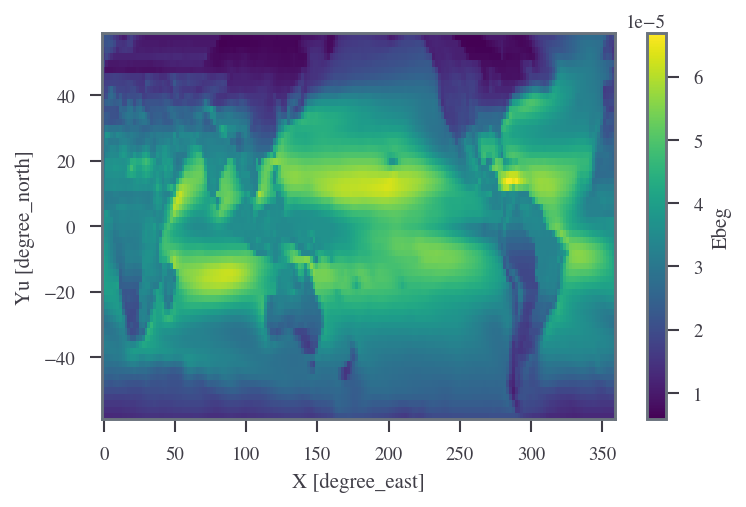

<xarray.DataArray 'MCbeg' (Yu: 59, X: 180)>
array([[-5.086552e-06, -5.118616e-06, -5.131256e-06, ..., -5.067504e-06,
        -5.067280e-06, -5.072084e-06],
       [-5.381425e-06, -5.507433e-06, -5.640001e-06, ..., -5.443365e-06,
        -5.471712e-06, -5.431407e-06],
       [-6.148149e-06, -6.452610e-06, -6.756640e-06, ..., -5.879668e-06,
        -6.235407e-06, -6.267882e-06],
       ...,
       [-8.570185e-06, -5.176899e-06, -4.223909e-06, ..., -1.101982e-05,
        -1.093446e-05, -1.154465e-05],
       [-4.183050e-06, -2.462236e-06, -3.459727e-06, ..., -1.067455e-05,
        -1.230870e-05, -1.000487e-05],
       [-3.414447e-06, -3.027766e-06, -3.950615e-06, ..., -8.965081e-06,
        -1.091078e-05, -7.950227e-06]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


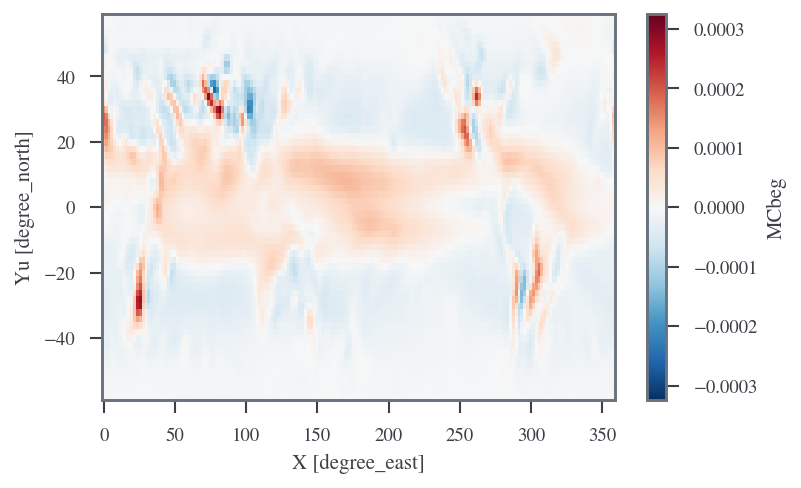

<xarray.DataArray 'qabeg' (Yu: 59, X: 180)>
array([[0.002989, 0.002992, 0.002996, ..., 0.003007, 0.002998, 0.00299 ],
       [0.003087, 0.003094, 0.003086, ..., 0.003102, 0.003092, 0.003083],
       [0.003283, 0.003298, 0.003275, ..., 0.003276, 0.003278, 0.00327 ],
       ...,
       [0.006   , 0.006033, 0.006105, ..., 0.006377, 0.006332, 0.006104],
       [0.005805, 0.005933, 0.005962, ..., 0.00629 , 0.006176, 0.005722],
       [0.005849, 0.005873, 0.00582 , ..., 0.006243, 0.006047, 0.005809]])
Coordinates:
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu       (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0


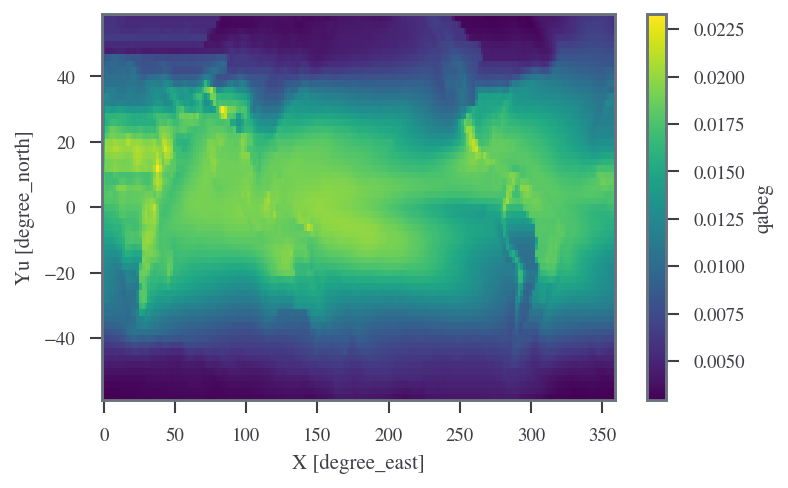

<Figure size 826.772x510.973 with 0 Axes>

In [7]:
for item in os.listdir(ATMOS_TMP_PATH):
    name = ATMOS_TMP_PATH / item
    print(name)
    xr_ds = xr.open_dataset(name, decode_times=False)
    print(xr_ds)
    for var in [
        x
        for x in xr_ds.variables
        if "0" not in x and "Yu" not in x and "Yv" not in x and "X" not in x
        and "Hq" not in x and "epsv" not in x and "epsu" not in x and "K" not in x
    ]:
        xr_da = xr_ds[var]
        print(xr_da)
        xr_da.plot()
        plt.show()
        plt.clf()

In [24]:
print(xr.open_dataset("/Users/simon/seager19/atmos/tmp/S91-Hq1800-PrcpLand0.nc").epsu.__str__())

<xarray.DataArray 'epsu' ()>
array(0.75, dtype=float32)
Attributes:
    units:    day
